# Практическая работа №1 "Знакомство с библиотеками Numpy и Matplotlib"

**Цель работы:** освоить базовые приёмы работы с числовыми массивами в NumPy и построения графиков в Matplotlib для визуального анализа данных.

## Дорожная карта: что вы изучите в этой работе

В этой практической работе вы шаг за шагом разберёте базовые приёмы, которые используются в реальных проектах с нейросетями.

**NumPy (работа с массивами):**
- создание массивов разными способами (`np.array`, `np.arange`, `np.zeros`, `np.ones`, `np.full`, случайные числа);  
- индексация и срезы: выбор элементов, строк, столбцов и подмассивов;  
- базовые операции над массивами: поэлементные действия, матричное умножение, работа с осями;  
- статистика: сумма, минимум/максимум, среднее, дисперсия, перцентили;  
- маскирование: выбор и изменение элементов по условию (логические маски).

**Matplotlib (визуализация данных):**
- построение простых графиков (линейные графики функций);  
- scatter‑диаграммы (точечные графики);  
- базовая стилизация: заголовки, подписи осей, легенды, сетка, несколько графиков на одном рисунке;  
- работа с изображениями (загрузка и отображение картинок как массивов).

**Связь с нейросетями:**
- как представлять данные для модели в виде массивов NumPy (признаки, батчи, целевые метки);  
- как с помощью NumPy считать лоссы и простые метрики на массивах предсказаний и ответов;  
- как с помощью Matplotlib строить графики обучения (loss/accuracy по эпохам) и визуализировать результаты работы модели.

Дальше в работе вы будете постоянно возвращаться к этим навыкам — сначала на простых примерах, а затем и в задачах, связанных с нейросетями.


# Работа с массивами в библиотеке NumPy

## Начало работы с NumPy

При изучении синтаксиса возникает вопрос: зачем знание **Python** при работе с нейронными сетями? Команды на этом языке понимает не сама сеть, а компьютер, который управляет её созданием и обучением.

Нейросеть же обрабатывает данные — числа, тексты, изображения, звуки. Чтобы она могла с ними работать, любую информацию нужно представить в числовом виде. Это и есть «язык», понятный нейросети.

Для перевода данных в числа используются специальные библиотеки. Одна из них — **NumPy**.

Название происходит от слов **Numerical Python**. **NumPy** преобразует изображения, тексты и другие данные в числовые массивы, которые нейросеть может анализировать.


In [ ]:
import numpy as np # Вызов библиотеки Numpy под псевдонимом np

**Как библиотека NumPy связана с числами?**

Основная задача **NumPy** — представлять данные в числовой форме. Благодаря этому тексты, изображения или звуки можно преобразовать в набор чисел, понятный компьютеру.
Чем больше данных, тем больше числовых значений требуется.

Пример:


In [ ]:
# Создание массива из списка чисел
lst = [10, 20, 30, 40]       # Исходный список чисел
arr = np.array(lst)          # Преобразование списка в массив NumPy
print(arr)                   # Вывод созданного массива
print(type(arr))             # Проверка типа данных (должен быть <class 'numpy.ndarray'>)

[10 20 30 40]
<class 'numpy.ndarray'>


Пример, показывающий разницу между удалением элементов в обычном списке Python и в массиве NumPy:

In [ ]:
print('Список:', lst)
print('Массив:', arr)

Список: [10, 20, 30, 40]
Массив: [10 20 30 40]


In [ ]:
# Удаляем второй элемент (индекс 1)
del lst[1]                  # В списке удаляем элемент по индексу
arr_new = np.delete(arr, 1) # В NumPy тоже удаляем по индексу

print('\nПосле удаления второго элемента:')
print('Список:', lst)             # Исходный список изменился
print('Новый массив:', arr_new)   # Создан новый массив без второго элемента
print('Исходный массив:', arr)    # Старый массив остался без изменений


После удаления второго элемента:
Список: [10, 30, 40]
Новый массив: [10 30 40]
Исходный массив: [10 20 30 40]


### Функция `np.arange()`

**`np.arange()`** используется для создания массива, содержащего последовательность чисел в заданном диапазоне.

**Синтаксис**
```python
np.arange(start, stop, step)
```
**Параметры**
* start — начало диапазона (включительно)
* stop — конец диапазона (не включая это значение)
* step — шаг между числами


In [ ]:
arr = np.arange(0, 10, 2)
print(arr)   # [0 2 4 6 8]

[0 2 4 6 8]


### Функции `numpy.zeros()` и `numpy.ones()`

Функции **`numpy.zeros()`** и **`numpy.ones()`** используются для создания массивов заданного размера, заполненных нулями или единицами соответственно.

**Синтаксис**
```python
np.zeros(shape)
np.ones(shape)
```

**Параметры**
* shape — кортеж, задающий размеры массива (например, (3, 4) — это 3 строки и 4 столбца).

In [ ]:
# Массив из 5 элементов, заполненный нулями
zeros_arr = np.zeros(5)
print(zeros_arr)

[0. 0. 0. 0. 0.]


In [ ]:
# Двумерный массив 2×3, заполненный единицами
ones_arr = np.ones((2, 3))
print(ones_arr)

[[1. 1. 1.]
 [1. 1. 1.]]


### Функция `numpy.full()`

Функция **`numpy.full()`** используется для создания массива заданного размера, заполненного указанным пользователем значением.

**Синтаксис**
```python
np.full(shape, fill_value)
```

**Параметры**
* shape — кортеж, определяющий размеры массива (например, (2, 3) — 2 строки и 3 столбца);

* fill_value — значение, которым заполняется весь массив.

In [ ]:
# Создание массива 3×3, заполненного числом 7
arr = np.full((3, 3), 7)
print(arr)

[[7 7 7]
 [7 7 7]
 [7 7 7]]


### Создание случайных массивов

В Python есть модуль `random` для работы с одиночными случайными числами. Но для работы с массивами данных используется `numpy.random` — он создаёт целые массивы за один раз и работает намного быстрее.

**Фиксация результата (seed)**

При работе со случайными числами каждый запуск даёт новый результат. Чтобы получить воспроизводимый результат (например, для проверки задания), используется **seed** — «зерно» генератора случайных чисел.

In [ ]:
# Каждый раз новый результат
print('Первый запуск:', np.random.randint(1, 10, 5))
print('Второй запуск:', np.random.randint(1, 10, 5))

Первый запуск: [3 7 8 5 4]
Второй запуск: [8 8 3 6 5]


In [ ]:
# Фиксируем seed — результат будет одинаковым
np.random.seed(42)
print('Первый запуск:', np.random.randint(1, 10, 5))

np.random.seed(42)  # Сбрасываем seed на то же значение
print('Второй запуск:', np.random.randint(1, 10, 5))

Первый запуск: [7 4 8 5 7]
Второй запуск: [7 4 8 5 7]


> **Совет:** Используйте `np.random.seed()` в начале работы, чтобы результаты можно было повторить. Число внутри (например, 42) может быть любым — главное, чтобы оно было одинаковым.

Обратите внимание
Как и в функции arange(), верхняя граница (high) никогда не включается в результат. Если вы укажете диапазон (1, 11), компьютер выберет числа только от 1 до 10.

### Функция `numpy.random.randint()`

Функция **`np.random.randint()`** используется для создания массива, заполненного случайными целыми числами в заданном диапазоне.

**Синтаксис**
```python
np.random.randint(low, high, size)
```
**Параметры**

* low — нижняя граница диапазона (включительно);

* high — верхняя граница диапазона (не включая это значение);

* size — размер или форма создаваемого массива (например, 5 — для одномерного массива из 5 элементов, или (2, 3) — для таблицы).


In [ ]:
# Генерируем массив и сохраняем его в переменную arr
# 1 — начало диапазона, 11 — конец (не включая), 5 — количество элементов
arr = np.random.randint(1, 11, 5)
print(arr)

[4 8 8 3 6]


### Функция `numpy.random.choice()`

Функция **`np.random.choice()`** позволяет извлечь один или несколько случайных элементов из готового набора данных (массива или списка).

**Синтаксис**
```python
np.random.choice(a, size, replace, p)
```

**Параметры**

* a — исходный массив или список, из которого производится выбор.

* size — количество элементов, которые нужно достать (результатом будет массив).

* replace — можно ли выбирать одно и то же значение несколько раз (True по умолчанию).

* p — массив вероятностей для каждого элемента (если нужно, чтобы кто-то выпадал чаще).

In [ ]:
# Исходный массив данных
my_list = ['нейросеть', 'данные', 'алгоритм', 'числа', 'Python']

# Задаем вероятности для каждого элемента (в сумме дают 1.0)
# 'нейросеть' выпадет в 50% случаев, а 'Python' — в 30%
probabilities = [0.5, 0.05, 0.05, 0.1, 0.3]

# 1. Выбор с учетом вероятностей
weighted_choice = np.random.choice(my_list, p=probabilities)
print('Выбор с учетом весов:', weighted_choice)

# 2. Выбор нескольких элементов с учетом тех же вероятностей
multiple_weighted = np.random.choice(my_list, size=10, p=probabilities)
print('Выборка из 10 элементов:\n', multiple_weighted)

# 3. Пример со случайными числами из диапазона
numbers = np.arange(10, 100, 10) # Массив
random_num = np.random.choice(numbers, size=2)
print('Два числа из диапазона (равновероятно):', random_num)

Выбор с учетом весов: Python
Выборка из 10 элементов:
 ['нейросеть' 'Python' 'числа' 'нейросеть' 'нейросеть' 'Python' 'алгоритм'
 'нейросеть' 'нейросеть' 'нейросеть']
Два числа из диапазона (равновероятно): [70 80]


### Функция `numpy.argmax()` в библиотеке NumPy

Функция **`np.argmax()`** находит максимальное значение в массиве и возвращает его **индекс** (позицию), а не само число.

**Синтаксис**
```python
np.argmax(arr, axis=None)
```

**Параметры**

* arr — массив, в котором производится поиск;

* axis — ось, вдоль которой нужно искать (например, 0 для поиска по столбцам или 1 для поиска по строкам). Если не указан, массив рассматривается как плоский список.

In [ ]:
# Одномерный массив
# Передаем список [1, 5, 2, 9, 3] в функцию np.array
arr = np.array([1, 5, 2, 9, 3])

# Теперь argmax сработает корректно
max_idx = np.argmax(arr)

print(f"Массив: {arr}")
print(f"Индекс максимального элемента: {max_idx}") # Выведет 3 (позиция числа 9)

Массив: [1 5 2 9 3]
Индекс максимального элемента: 3


In [ ]:
# Двумерный массив

# Создаем матрицу 2x3
arr_2d = np.array([[10, 20, 30],
                   [60, 50, 40]])

# 1. Поиск индекса во всей матрице (как если бы она была одной строкой)
print('Индекс во всей матрице:', np.argmax(arr_2d))

# 2. Поиск индексов по столбцам (axis=0)
print('Индексы по столбцам:', np.argmax(arr_2d, axis=0))

# 3. Поиск индексов по строкам (axis=1)
print('Индексы по строкам:', np.argmax(arr_2d, axis=1))

Индекс во всей матрице: 3
Индексы по столбцам: [1 1 1]
Индексы по строкам: [2 0]


### Функция `numpy.where()` в библиотеке NumPy

Функция **`np.where()`** работает как умный фильтр: она проверяет условие для каждого элемента массива и выбирает одно из двух значений в зависимости от результата.

**Синтаксис**
```python
np.where(condition, [x, y])
```

**Параметры**

* condition — логическое условие (например, arr > 5), которое проверяется для каждого элемента;

* x — значение, которое будет подставлено, если условие истинно (True);

* y — значение, которое будет подставлено, если условие ложно (False).

In [ ]:
arr = np.array([1, 5, 2, 9, 3])

# Заменяем числа: если больше 7, пишем 1, если меньше — пишем 0
result = np.where(arr > 7, 1, 0)

print('Исходный массив:', arr)
print('Результат фильтрации:', result)

Исходный массив: [1 5 2 9 3]
Результат фильтрации: [0 0 0 1 0]


In [ ]:
# Использование условия «ИЛИ» (|)
# Генерируем массив из 5 чисел от 1 до 3
arr = np.random.randint(1, 4, 5)

# Если число равно 1 ИЛИ 3, заменяем его на 100. Иначе оставляем как есть (arr)
new_arr = np.where((arr == 1) | (arr == 3), 100, arr)

print('Оригинал "ИЛИ":', arr)
print('Обработанный: ', new_arr)

Оригинал "ИЛИ": [3 3 2 1 2]
Обработанный:  [100 100   2 100   2]


In [ ]:
# Использование условия «И» (&)
# Генерируем массив из 5 чисел от 1 до 9
arr = np.random.randint(1, 10, 5)

# Если число > 5 И одновременно < 8, заменяем на 'OK'. Иначе — на '-1'
# Обратите внимание: массив станет строковым из-за слова 'OK'
new_arr = np.where((arr > 5) & (arr < 8), 'OK', '-1')

print('Оригинал "И":', arr)
print('Обработанный:', new_arr)

Оригинал "И": [8 4 2 6 6]
Обработанный: ['-1' '-1' '-1' 'OK' 'OK']


## Типы данных в NumPy

В массивах NumPy действует строгое правило: **все элементы должны быть одного типа**. Если в массив попадают разные данные, они автоматически приводятся к общему, более сложному формату:

*   **int** (целые числа) — если массив состоит только из целых чисел.
*   **float** (дробные числа) — если в массиве есть хотя бы одно дробное число. Целые числа при этом преобразуются (например, `5` станет `5.0`).
*   **Unicode (U)** — если среди данных есть текст. В этом случае все элементы массива превратятся в строки.

> ***Совет:*** Чтобы проверить, какой тип данных используется в конкретном массиве, используйте атрибут `.dtype`.

In [ ]:
# 1. Массив из целых чисел
arr_int = np.array([1, 2, 3, 4, 5])
print(f"Тип целых чисел: {arr_int.dtype}")

Тип целых чисел: int64


In [ ]:
# 2. Массив со смешанными числами (целые + дробные)
arr_float = np.array([1, 2.5, 3])
print(f"Тип со смешанными числами: {arr_float.dtype}")

Тип со смешанными числами: float64


In [ ]:
# 3. Массив со строками
arr_str = np.array(["First", "Second", "12345"])
print(f"Тип строковых данных: {arr_str.dtype}")

Тип строковых данных: <U6


**Что означают цифры в типах данных (int64, float32)?**

Цифры (**8, 16, 32, 64**) после названия типа указывают на объем памяти в битах, который выделяется для хранения одного элемента массива.

*   **Точность:** Чем больше число, тем более крупные или точные значения может хранить массив.
*   **Ресурсы:** Массивы с большими числами (например, `float64`) занимают значительно больше оперативной памяти, чем типы с меньшей битностью.

**Особенности типа Unicode (<U6)**

Тип **`<U6`** указывает на работу с текстовыми данными в формате Unicode.

*   **Символ `U`:** Означает, что данные в массиве являются строками.
*   **Цифра `6`:** Показывает длину самой длинной строки в данном наборе (в примере — 6 символов).
*   **Фиксация:** Если вы попробуете добавить в такой массив слово длиннее 6 символов, оно может быть автоматически обрезано.

In [ ]:
f16 = np.float16("0.1")
f32 = np.float32(f16)
f64 = np.float64(f32)
print(f16 == f32 == f64)
f16, f32, f64

True


(np.float16(0.1), np.float32(0.099975586), np.float64(0.0999755859375))

##Размерности и форма массивов **Numpy**

Для обработки данных в NumPy почти всегда нужны не одиночные числа, а структуры из чисел — массивы `ndarray` (их удобно воспринимать как «контейнеры данных»).
Размерность массива описывается двумя базовыми понятиями: `ndim` (сколько измерений/осей) и `shape` (сколько элементов по каждой оси).
1. **Скаляр** — одно число (например, `4`).  
   В NumPy скаляру соответствует 0D-значение: у него `ndim = 0`, а `shape = ()` (пустой кортеж).

2. **Вектор** — одномерный массив (1D).  
   Пример: `np.array([1, 2])` имеет `shape = (2,)` и `ndim = 1`.  
   Важно: запись `[4]` — это не «скаляр», а 1D-вектор длины 1 (форма `(1,)`).

3. **Матрица** — двумерный массив (2D), как таблица «строки × столбцы».  
   Например, массив формы `(3, 4)` — это 3 строки и 4 столбца.

4. **Тензор** — общее слово для массива любой размерности (обычно 3D и выше).
   Например, форма `(3, 2, 4)` означает 3 «слоя», в каждом по 2 строки и 4 столбца (итого 3D).

Примеры (как это выглядит в записи):

```python
# 0D (скаляр в NumPy)
-4                # shape = ()

# 1D (вектор)
[-4, -5]          # shape = (2,)

# 2D (матрица)
[[-4, -5],
 [ 2, -1]]        # shape = (2, 2)

# 3D (тензор)
[[[-4, -5],
  [ 2, -1]],

 [[ 4, -1],
  [-4,  0]],

 [[ 0, -2],
  [-4, -3]]]      # shape = (3, 2, 2)
```

In [ ]:
# Тензор 3×2×2 с целыми числами от -2 до 7 (7 не включается)
tensor = np.random.randint(-2, 8, size=(3, 2, 2))  # shape: (3, 2, 2)
print(tensor)                                      # вывод трёхмерного тензора

[[[ 7  1]
  [ 3 -1]]

 [[ 7 -1]
  [ 7  1]]

 [[ 5  4]
  [ 6  5]]]


Свойства массивов NumPy помогают быстро понять, **какой формы** у вас данные и сколько в них элементов.

- `.ndim` показывает, сколько осей (измерений) у массива.  
  Примеры: скаляр → `ndim = 0`, вектор → `ndim = 1`, матрица → `ndim = 2`, тензор `shape = (3, 2, 2)` → `ndim = 3`.

- `.shape` показывает форму массива — кортеж из размеров по каждой оси.  
  Например, `shape = (3, 2, 2)` значит: 3 слоя, в каждом 2 строки и 2 столбца; длина `shape` равна `ndim`.

- `.size` показывает общее число элементов в массиве.  
  Это просто произведение всех чисел из `shape`: для `shape = (3, 2, 2)` размер `size = 3 · 2 · 2 = 12`.

Посмотрим на простом примере:


In [ ]:
print("tensor =")
print(tensor)
print("ndim :", tensor.ndim)   # количество осей
print("shape:", tensor.shape)  # размеры по осям
print("size :", tensor.size)   # всего элементов

tensor =
[[[ 7  1]
  [ 3 -1]]

 [[ 7 -1]
  [ 7  1]]

 [[ 5  4]
  [ 6  5]]]
ndim : 3
shape: (3, 2, 2)
size : 12


Примеры тензоров с разной размерностью:

In [ ]:
# Вектор (1D-тензор)
vec = np.array([1, 2, 3, 4])
print("vec =", vec)
print("ndim =", vec.ndim)     # 1
print("shape =", vec.shape)   # (4,)
print("size =", vec.size)     # 4

vec = [1 2 3 4]
ndim = 1
shape = (4,)
size = 4


In [ ]:
# Матрица (2D-тензор)
mat = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print("mat =")
print(mat)
print("ndim =", mat.ndim)     # 2
print("shape =", mat.shape)   # (2, 3)
print("size  =", mat.size)    # 6

mat =
[[1 2 3]
 [4 5 6]]
ndim = 2
shape = (2, 3)
size  = 6


In [ ]:
# Тензор 4D (например, набор картинок 2×3×3)
tensor4d = np.random.randint(0, 10, size=(2, 3, 3, 3))
print("tensor4d.shape =", tensor4d.shape)  # (2, 3, 3, 3)
print("ndim =", tensor4d.ndim)             # 4
print("size =", tensor4d.size)             # 54

tensor4d.shape = (2, 3, 3, 3)
ndim = 4
size = 54


In [ ]:
# Тензор 5D (например, batch × time × высота × ширина × каналы)
tensor5d = np.random.randint(0, 10, size=(4, 5, 2, 2, 3))
print("tensor5d.shape =", tensor5d.shape)  # (4, 5, 2, 2, 3)
print("ndim =", tensor5d.ndim)             # 5
print("size =", tensor5d.size)             # 4*5*2*2*3 = 240

tensor5d.shape = (4, 5, 2, 2, 3)
ndim = 5
size = 240


## Объединение (склейка) массивов

Часто нужно собрать данные из нескольких частей в один большой массив. Для этого в NumPy есть несколько способов.

#### `np.concatenate` — основной инструмент

Позволяет склеивать массивы вдоль уже существующей оси (axis).
*   `axis=0`: склейка «по вертикали» (добавляем строки вниз).
*   `axis=1`: склейка «по горизонтали» (добавляем столбцы справа).

> **Важно:** Размеры массивов по остальным осям должны совпадать! Нельзя приклеить 2 строки к 3 строкам по горизонтали.

In [ ]:
arr1 = np.zeros((4,4))
arr2 = np.ones((4,4))

# Склейка вдоль оси 0 (вертикально)
res_v = np.concatenate((arr1, arr2), axis=0)
# Результат: таблица 8x4

# Склейка вдоль оси 1 (горизонтально)
res_h = np.concatenate((arr1, arr2), axis=1)
# Результат: таблица 4x8

print("Матрица нулей (4x4):")
print(arr1)

print("\nМатрица единиц (4x4):")
print(arr2)

print(f"\nСклейка по axis=0 (вертикально). Новая форма: {res_v.shape}")
print(res_v)

print(f"\nСклейка по axis=1 (горизонтально). Новая форма: {res_h.shape}")
print(res_h)

Матрица нулей (4x4):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Матрица единиц (4x4):
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Склейка по axis=0 (вертикально). Новая форма: (8, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Склейка по axis=1 (горизонтально). Новая форма: (4, 8)
[[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]]


#### `np.vstack` и `np.hstack` — удобные обертки
Если путаетесь в осях, используйте эти функции — они делают то же самое, но название говорит само за себя.

* `np.vstack((a, b))` (Vertical Stack) — то же, что concatenate(..., `axis=0`). Ставит массивы друг на друга.

* `np.hstack((a, b))` (Horizontal Stack) — то же, что concatenate(..., `axis=1`). Ставит массивы рядом (бок о бок).

In [ ]:
# Вертикально (Vertical)
v_stack = np.vstack((arr1, arr2))
print('v_stack:\n',v_stack)


# Горизонтально (Horizontal)
h_stack = np.hstack((arr1, arr2))
print('h_stack:\n',h_stack)

v_stack:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
h_stack:
 [[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]]


#### `np.stack` — создание новой оси
В отличие от `concatenate`, эта функция **создаёт новое измерение**. Она «укладывает» массивы в стопку, как листы бумаги, превращая 2D-матрицы в 3D-тензор.

In [ ]:
# Укладываем две матрицы в стопку
layers = np.stack((arr1, arr2))
print(layers)
print(layers.shape)


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
(2, 4, 4)


## Индексация и срезы (Slicing)

Работа с индексами в NumPy похожа на обычные списки Python, но с возможностью обращаться сразу к нескольким измерениям через запятую: `[строки, столбцы]`.



#### Доступ к конкретному элементу
Чтобы достать один элемент, указываем индексы для каждой оси через запятую: `[y, x]` (строка, столбец).

In [ ]:
# Матрица 4x4 со случайными числами от 0 до 9
arr = np.random.randint(0, 10, size=(4, 4))

print("Исходная матрица:")
print(arr)

Исходная матрица:
[[0 7 4 4]
 [6 3 5 3]
 [2 6 7 3]
 [1 9 2 0]]


In [ ]:
# Элемент во 2-й строке (индекс 1) и 3-м столбце (индекс 2)
val = arr[1,2]
print("\nЭлемент :", val)


Элемент : 5


In [ ]:
print(tensor[2, 1, 0])                          # Здесь способ найти отдельное число под индексом 0
                                                # Число взято из слоя 2, строки 1 и столбца 0 тензора

6


#### Срезы (Slicing)
Можно вырезать подмассивы, указывая диапазон `start:stop:step`.

* `:` — взять всё по этой оси.

* `1:3`— от 1-го включительно до 3-го не включительно.

* `::2` — каждый второй элемент.

In [ ]:
# 1. Взять только вторую строку (индекс 1) целиком
row_1 = arr[1, :]
print("\nВторая строка (arr[1, :]):", row_1)


Вторая строка (arr[1, :]): [6 3 5 3]


In [ ]:
# 2. Взять только третий столбец (индекс 2)
col_2 = arr[:, 2]
print("Третий столбец (arr[:, 2]):", col_2)

Третий столбец (arr[:, 2]): [4 5 7 2]


In [ ]:
# 3. Вырезать центральный квадрат 2x2 (строки 1-2, столбцы 1-2)
center_block = arr[1:3, 1:3]
print("\nЦентральный блок 2x2 (arr[1:3, 1:3]):")
print(center_block)


Центральный блок 2x2 (arr[1:3, 1:3]):
[[3 5]
 [6 7]]


#### Индексация с шагом
Можно пропускать элементы, задавая шаг третьим параметром.

In [ ]:
# Строки с 0 по последнюю с шагом 2, столбцы с 0 по последнюю с шагом 2
# (берем элементы через один)
step_slice = arr[::2, ::2]
print("\nЭлементы через один (шахматный порядок):")
print(step_slice)


Элементы через один (шахматный порядок):
[[0 4]
 [2 7]]


## Операции с тензорами

NumPy позволяет выполнять математические действия сразу над целыми массивами — это работает быстрее и пишется короче, чем циклы `for`.

#### Поэлементные операции
Действия выполняются для каждой пары чисел, стоящих на одинаковых местах в двух массивах.
Для наглядности возьмем два небольших массива:

In [ ]:
arr_1 = np.random.randint(-5, 5, 5)
arr_2 = np.random.randint(-5, 5, 5)
print(arr_1)
print(arr_2)

[ 2 -3  4  1  4]
[-1  4 -1  1  3]


Теперь простые операции:

In [ ]:
print("Сумма (arr_1 + arr_2):",     arr_1 + arr_2)
print("Разность (arr_1 - arr_2):",  arr_1 - arr_2)
print("Умножение (arr_1 * arr_2):", arr_1 * arr_2)
print("Деление (arr_1 / arr_2):",   arr_1 / arr_2)

Сумма (arr_1 + arr_2): [1 1 3 2 7]
Разность (arr_1 - arr_2): [ 3 -7  5  0  1]
Умножение (arr_1 * arr_2): [ -2 -12  -4   1  12]
Деление (arr_1 / arr_2): [-2.         -0.75       -4.          1.          1.33333333]


#### Матричное умножение

**Матричное умножение** — операция, где результат $ C = A \times B $ имеет форму $ (m, p) $, если $ A $ — $ (m, n) $, $ B $ — $ (n, p) $. Это сумма произведений строк $ A $ на столбцы $ B $.

Пример: $ A $ формы $ (2, 3) $, $ B $ формы $ (3, 2) $:

$$
A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad
B = \begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}
$$

Вычисления:

$$
C_{11} = 1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58
$$

$$
C_{12} = 1 \cdot 8 + 2 \cdot 10 + 3 \cdot 12 = 64
$$

$$
C_{21} = 4 \cdot 7 + 5 \cdot 9 + 6 \cdot 11 = 139
$$

$$
C_{22} = 4 \cdot 8 + 5 \cdot 10 + 6 \cdot 12 = 154
$$

Результат $ C $ формы $ (2, 2) $:

$$
C = \begin{bmatrix}
58 & 64 \\
139 & 154
\end{bmatrix}
$$

В NumPy: `np.dot(A, B)` или `A @ B`.


In [ ]:
import numpy as np

A = np.array([[1, 2, 3],[4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

print("C =\n", np.dot(A, B))
print("C =\n", A @ B)

C =
 [[ 58  64]
 [139 154]]
C =
 [[ 58  64]
 [139 154]]


### Основные статистические методы в NumPy

Для всех примеров зададим массив:

In [ ]:
import numpy as np

data = np.random.randint(0, 10, size=10)
print("data:", data)

data: [4 0 9 9 0 1 5 8 7 4]


In [ ]:
# 1. Сумма, минимум, максимум
print("sum   =", np.sum(data))   # сумма всех элементов
print("min   =", np.min(data))   # минимум
print("max   =", np.max(data))   # максимум
print("ptp   =", np.ptp(data))   # размах: max - min

sum   = 47
min   = 0
max   = 9
ptp   = 9


In [ ]:
# 2. Среднее и медиана
print("mean   =", np.mean(data))    # среднее арифметическое
print("median =", np.median(data))  # медиана (срединное значение)

mean   = 4.7
median = 4.5


In [ ]:
# 3. Дисперсия и стандартное отклонение
print("var =", np.var(data))   # дисперсия
print("std =", np.std(data))   # стандартное отклонение

var = 11.209999999999997
std = 3.348133808556641


In [ ]:
# 4. Перцентили
print("25-й перцентиль  =", np.percentile(data, 25))
print("25 и 75 перц.    =", np.percentile(data, [25, 75]))

25-й перцентиль  = 1.75
25 и 75 перц.    = [1.75 7.75]


In [ ]:
# 5. Статистика по осям (для матриц/тензоров)
mat = np.random.randint(0, 10, size=(3, 4))
print("\nmat =\n", mat)

print("\nmean по столбцам  (axis=0):", np.mean(mat, axis=0))
print("mean по строкам   (axis=1):", np.mean(mat, axis=1))

print("\nmax по столбцам   (axis=0):", np.max(mat, axis=0))
print("min по строкам    (axis=1):", np.min(mat, axis=1))


mat =
 [[0 6 4 5]
 [6 2 9 2]
 [4 5 8 4]]

mean по столбцам  (axis=0): [3.33333333 4.33333333 7.         3.66666667]
mean по строкам   (axis=1): [3.75 4.75 5.25]

max по столбцам   (axis=0): [6 6 9 5]
min по строкам    (axis=1): [0 2 4]


## Концепция маскирования в NumPy


**Маскирование** — это способ выбирать и изменять элементы массива не по индексам, а по логическому условию.  
Мы сначала строим булеву маску (`True/False` для каждого элемента), а затем используем её как «фильтр» для массива.


### 1. Базовое маскирование на 1D-массиве

Создаём одномерный массив из 10 случайных целых чисел от 0 до 9.  
Это просто «сырые данные», с которыми будем работать.

In [ ]:
import numpy as np

# Исходный массив
arr = np.random.randint(0, 10, size=10)
print("arr:", arr)

arr: [0 3 4 9 9 4 6 3 0 4]


Мы сравниваем каждый элемент `arr` с числом `5`.  
Результат — булев массив той же формы, где на месте каждого элемента стоит `True`, если условие `> 5` выполняется, и `False` — если нет.

In [ ]:
mask = arr > 5          # условие → булев массив той же длины
print("mask:", mask)

mask: [False False False  True  True False  True False False False]


Используем булев массив `mask` как «фильтр».  
В результате получаем новый массив, куда попали только те элементы `arr`, для которых маска была `True` (то есть значения больше 5).

In [ ]:
selected = arr[mask]    # берём только элементы, где mask == True
print("> 5:", selected)

> 5: [9 9 6]


### 2. Комбинированные условия

Здесь комбинируем несколько условий:
- `mask2` — элементы от 3 до 7 включительно (`>= 3` И одновременно `<= 7`), оператор `&` — это логическое И.  
- `mask3` — элементы меньше 2 ИЛИ больше 8, оператор `|` — логическое ИЛИ.  

Дальше опять используем маски как фильтры и получаем два разных подмножества исходного массива.

**Важно:** логические операторы — это `&` и `|`, а не `and` и `or`. Также не забывайте скобки вокруг каждого условия!

In [ ]:
mask2 = (arr >= 3) & (arr <= 7)   # И
mask3 = (arr < 2) | (arr > 8)     # ИЛИ

print("3..7:", arr[mask2])
print("<2 или >8:", arr[mask3])

3..7: [3 4 4 6 3 4]
<2 или >8: [0 9 9 0]


### 3. Маскирование в 2D-массивах

Создаём матрицу размера 3×4 со случайными числами от 0 до 9.

In [ ]:
mat = np.random.randint(0, 10, size=(3, 4))
print("\nmat:\n", mat)


mat:
 [[6 9 9 5]
 [4 3 1 3]
 [9 9 2 9]]


#### 3.1 Выбрать все элементы, удовлетворяющие условию

Сравниваем все элементы матрицы с 5, получаем булеву матрицу той же формы `(3, 4)`.  
Когда подставляем её в индексацию `mat[elem_mask]`, NumPy возвращает одномерный массив со всеми элементами, где условие было `True` (то есть все числа ≥ 5).

In [ ]:
# взять только элементы ≥ 5
elem_mask = mat >= 5
print(">=5 (плоский список):", mat[elem_mask])

>=5 (плоский список): [6 9 9 5 9 9 9]


#### 3.2 Выбрать целые строки по условию

Здесь маска уже не для всех элементов, а только для строк:
- `mat[:, 0]` — берём первый столбец (все строки, 0‑й столбец).  
- `mat[:, 0] >= 5` — получаем булевой вектор длины 3: по одному `True/False` на строку.  
- `mat[row_mask]` — выбираем только те строки матрицы, где в первом столбце значение ≥ 5.

In [ ]:
# взять строки, где первый столбец ≥ 5
row_mask = mat[:, 0] >= 5
print("строки с mat[:,0] >= 5:\n", mat[row_mask])

строки с mat[:,0] >= 5:
 [[6 9 9 5]
 [9 9 2 9]]


### 4. Изменение элементов по маске

- Сначала создаём новый случайный массив `arr2`.  
- Выражение `arr2 < 5` создаёт маску: `True` там, где значение меньше 5.  
- В присваивании `arr2[arr2 < 5] = 0` мы говорим: «все элементы, где условие `< 5` выполняется, заменить на 0».  

In [ ]:
arr2 = np.random.randint(0, 10, size=10)
print("\narr2 до:", arr2)

arr2[arr2 < 5] = 0      # всё, что меньше 5, заменяем на 0
print("arr2 после:", arr2)


arr2 до: [0 7 4 3 7 6 1 0 3 7]
arr2 после: [0 7 0 0 7 6 0 0 0 7]


Это типичный приём для очистки данных: отсечение маленьких значений, обнуление выбросов, замена «плохих» элементов без циклов.

### 5. Практический пример: фильтрация выбросов


In [ ]:
# Генерируем данные с выбросами
data = np.random.randint(-100, 100, size=20)
print("Исходные данные:", data)

# Считаем среднее и стандартное отклонение
mean = np.mean(data)
std = np.std(data)
print(f"mean = {mean:.2f}, std = {std:.2f}")

# Фильтруем выбросы (далеко от среднего)
outliers_mask = np.abs(data - mean) > 2 * std
clean_data = data[~outliers_mask]  # ~ — это НЕ (инверсия маски)

print("Выбросы удалены. Осталось:", clean_data)

Исходные данные: [ 39  77  62  23 -68  60  88  78  70   0 -89 -34 -36  60  67 -27 -58 -57
 -72  40]
mean = 11.15, std = 58.68
Выбросы удалены. Осталось: [ 39  77  62  23 -68  60  88  78  70   0 -89 -34 -36  60  67 -27 -58 -57
 -72  40]


Здесь показан реальный случай использования маскирования:
- Вычисляем статистику данных (среднее, стандартное отклонение).
- Строим маску для элементов, которые отклоняются больше чем на 2σ от среднего.
- Оператор `~` инвертирует маску (берём элементы, где `False`).
- В результате получаем «чистые» данные без выбросов.

## Практические задания для закрепления материала

### Задача 1. Свойства массива
Создайте массив из 10 случайных целых чисел от 1 до 100.

Выведите:
- Сам массив
- Его форму
- Количество элементов
- Минимальное и максимальное значение

In [ ]:
import numpy as np

arr = np.random.randint(1,101,10)

print(arr)
print(arr.shape)
print(arr.size)
print(arr.min())
print(arr.max())

[45 32 45 61 47 21 80 85 75 36]
(10,)
10
21
85


### Задача 2. Срезы матрицы

Создайте матрицу 4x4 со случайными числами от 0 до 50.

Выполните:
- Выведите вторую строку (индекс 1)
- Выведите третий столбец (индекс 2)
- Выведите верхний левый блок 2x2

In [ ]:
arr1 = np.random.randint(0, 50, size = (4,4))
print(arr1)
print(arr1[1,:])
print(arr1[:,2])
print(arr1[:2,:2])

[[17  4 46 24]
 [ 1  9 29 49]
 [44  4 32  0]
 [17 31 46 48]]
[ 1  9 29 49]
[46 29 32 46]
[[17  4]
 [ 1  9]]


### Задача 3. Маскирование: выбор элементов

Создайте массив из 15 случайных целых чисел от 0 до 20.

Используя маскирование:
- Найдите все числа больше 10
- Найдите все числа, которые делятся на 3

In [ ]:
arr3 = np.random.randint(0,21, 15)



mask = arr3 > 10
mask1 = arr3 / 3

print("mask:", mask)
print("mask:", np.round(mask1))
print(arr3)


mask: [False  True  True  True False  True False False False False False False
  True  True  True]
mask: [3. 6. 5. 5. 3. 5. 2. 1. 2. 1. 1. 1. 6. 6. 6.]
[10 18 14 15 10 15  7  3  7  3  2  2 17 18 18]


### Задача 4. Замена по условию

Создайте массив из 12 случайных целых чисел от -5 до 5.

Замените все отрицательные числа на 0, а положительные на 1.

In [ ]:
arr4 = np.random.randint(-5,6,12)
print(arr4)

arr[arr > 0] = 1
arr[arr < 0] = 1

print(arr)

[-5  4  5  3  4  3  3  0  2  5 -5  4]
[1 1 1 1 1 1 1 1 1 1]


### Задача 5. Статистика по строкам и столбцам

Создайте матрицу 3x5 со случайными целыми числами от 10 до 100.

Выполните:
- Найдите среднее значение для каждого столбца
- Найдите сумму для каждой строки
- Найдите минимум и максимум всей матрицы

In [ ]:
matrix = np.random.randint(10,101, size=(3,5))
print(matrix)

print(np.round(np.mean(matrix, axis = 0)))
print(np.sum(matrix, axis = 1))
print(np.min(matrix))
print(np.max(matrix))

[[45 33 15 75 93]
 [84 13 88 15 60]
 [71 66 75 88 84]]
[67. 37. 59. 59. 79.]
[261 260 384]
13
93


# Библиотека Matplotlib для визуализации данных

**Matplotlib** — библиотека Python, предназначенная для создания графиков и диаграмм. Она позволяет визуализировать результаты вычислений и анализировать данные в наглядной форме.

## Основные возможности
* Построение линейных графиков, столбчатых диаграмм, гистограмм и других типов визуализаций.
* Настройка внешнего вида графиков: цвета, подписи осей, легенды.
* Работа с многомерными данными и создание сложных композиций из нескольких графиков.

## Применение в работе с нейросетями
Matplotlib используется для визуализации процесса обучения (например, графики изменения ошибки), анализа данных перед подачей в модель и отображения результатов классификации или предсказаний.

## Начало работы с Matplotlib

In [ ]:
# Подключение библиотеки визуализации данных
import matplotlib.pyplot as plt

### Пример создания диаграммы рассеяния

Диаграмма рассеяния (scatter plot) используется для отображения зависимости между двумя наборами данных. Каждая точка на графике соответствует паре значений из массивов `x` и `y`.

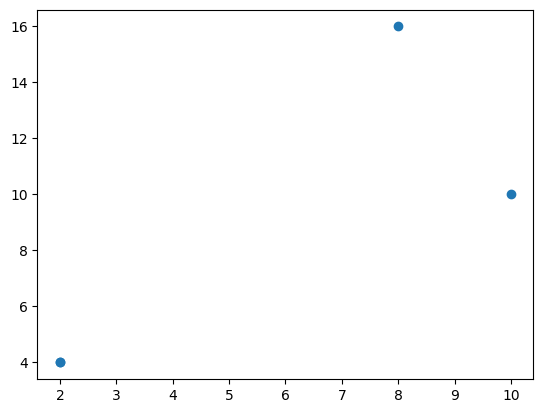

In [ ]:
# Данные для визуализации
y = [4, 16, 10, 4] # Значения по вертикальной оси
x = [2, 8, 10, 2]  # Значения по горизонтальной оси

# Построение диаграммы рассеяния
plt.scatter(x, y)

# Отображение графика
plt.show()

### Использование Seaborn для стилизации графиков

Библиотека **Seaborn** расширяет возможности Matplotlib, добавляя готовые стили оформления. Это делает графики более профессиональными и читаемыми.

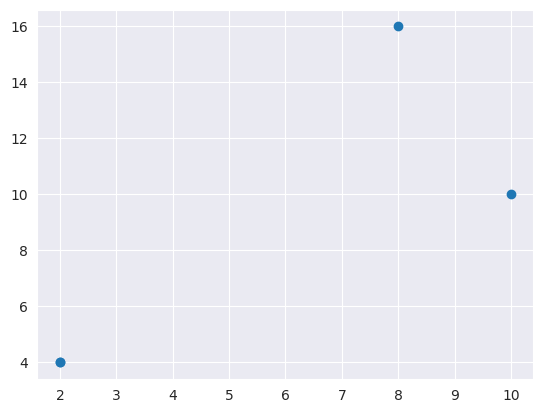

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль оформления графика
sns.set_style('darkgrid')  # Доступные стили: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Данные для визуализации
y = [4, 16, 10, 4] # Значения по вертикальной оси
x = [2, 8, 10, 2]  # Значения по горизонтальной оси

# Построение диаграммы рассеяния
plt.scatter(x, y)

# Отображение графика
plt.show()

### Построение линейного графика с помощью `plt.plot()`

Функция **`plt.plot()`** создает линейный график, соединяя точки последовательными линиями. Это удобно для отображения изменения данных во времени или зависимости одной величины от другой.

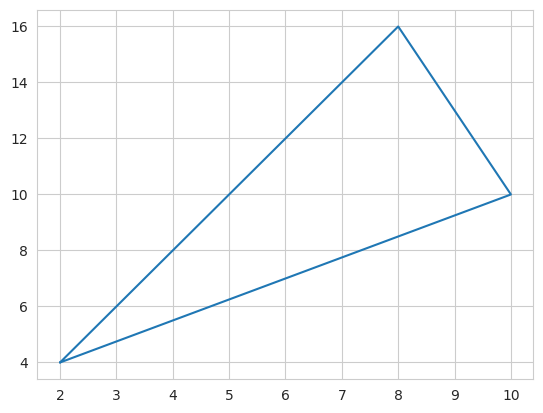

In [ ]:
# Устанавливаем стиль оформления графика
sns.set_style('whitegrid')  # Доступные стили: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Данные для визуализации
y = [4, 16, 10, 4] # Значения по вертикальной оси
x = [2, 8, 10, 2]  # Значения по горизонтальной оси

# Построение линейного графика
plt.plot(x, y)

# Отображение графика
plt.show()

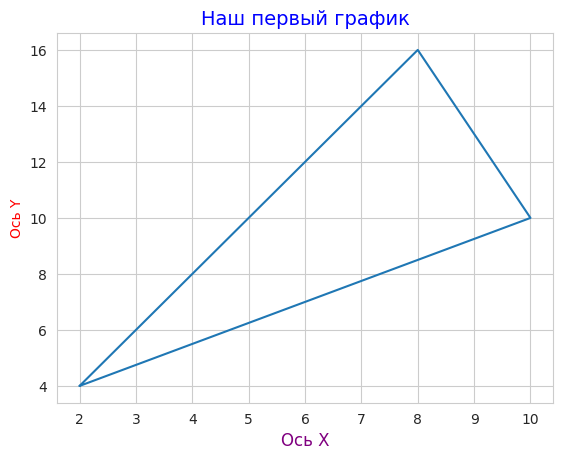

In [ ]:
# Построение линейного графика
plt.plot(x, y)

# Добавляем заголовок графика
# fontsize — размер шрифта, color — цвет текста ('b' означает blue/синий)
plt.title('Наш первый график', fontsize=14, color='b')

# Подпись вертикальной оси (Y)
plt.ylabel('Ось Y', fontsize=10, color='red')

# Подпись горизонтальной оси (X)
plt.xlabel('Ось X', fontsize=12, color='purple')

# Отображение графика на экране
plt.show()

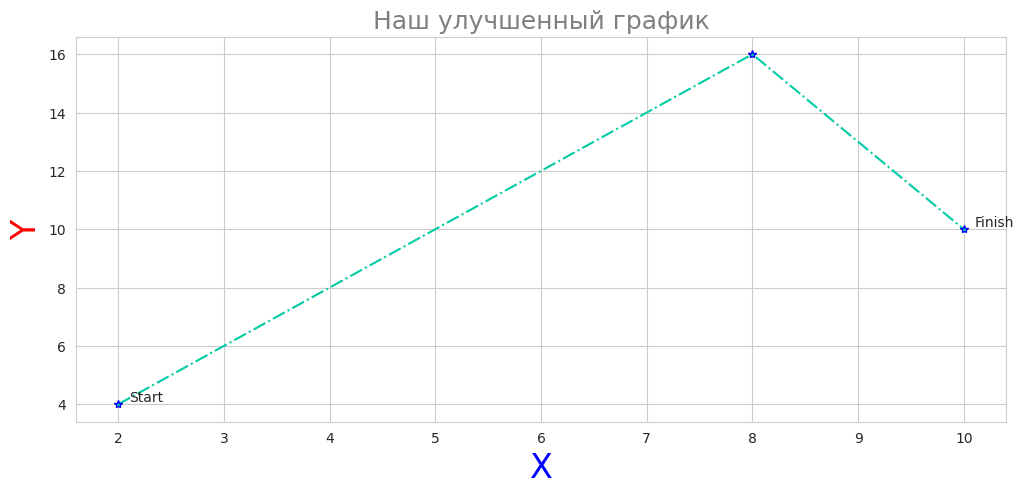

In [ ]:
# Данные для визуализации
y = [4, 16, 10] # Значения по вертикальной оси
x = [2, 8, 10]  # Значения по горизонтальной оси

# Устанавливаем размер графика (ширина=12, высота=5 дюймов)
plt.figure(figsize=(12, 5))

# Построение графика с настройками стиля
# ls — стиль линии ('-.', '--', '-', ':')
# marker — форма маркеров точек ('*', 'o', 's', '^')
# c — цвет линии (в формате HEX)
# mec — цвет границы маркера (marker edge color)
plt.plot(x, y, ls='-.', marker='*', c='#00cca3', mec='b')

# Заголовок графика
plt.title('Наш улучшенный график', fontsize=18, color='gray')

# Подписи осей
plt.ylabel('Y', fontsize=24, color='r')
plt.xlabel('X', fontsize=24, color='b')

# Добавление текстовых меток на график
# Формат: plt.text(x_координата, y_координата, 'текст')
plt.text(x[0]+0.1, y[0]+0.1, 'Start')   # Метка около первой точки
plt.text(x[-1]+0.1, y[-1]+0.1, 'Finish')      # Метка около последней точки

# Отображение графика
plt.show()


## Создадим на основе массива NumPy изображение

Метод **`plt.imshow()`** в библиотеке **Matplotlib** используется для отображения изображений и данных, представленных в виде двумерных массивов (например, изображений в формате массива пикселей). Он позволяет визуализировать такие данные в графическом виде.

Представим, что у нас есть массив, описывающий пиксели чёрно-белого изображения. В этом случае каждый элемент массива — это яркость пикселя. При вызове **`plt.imshow()`** этот массив будет показан как изображение, где значение каждого элемента определяет интенсивность точки на экране.

Вот простой пример:


[[1 1 0 0 1 0]
 [1 1 1 1 0 1]
 [0 1 0 1 0 0]
 [1 1 1 1 0 1]
 [0 0 1 0 0 0]
 [0 1 1 1 1 0]]


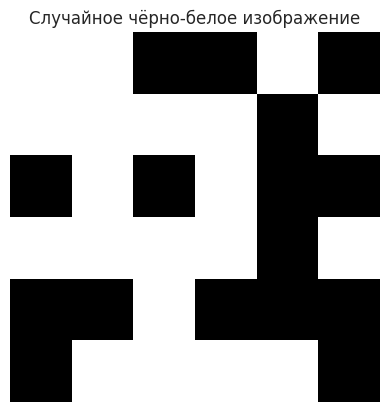

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем случайный массив 6×6 из 0 и 1
ex1 = np.random.randint(0, 2, (6, 6))
print(ex1)

# Отображаем массив как изображение
# cmap='gray' показывает 0 как чёрный, 1 как белый (градации серого)
plt.imshow(ex1, cmap='gray')
plt.title('Случайное чёрно-белое изображение')
plt.axis('off')
plt.show()

[[150 137 171 ... 221 230 154]
 [163 156  37 ... 214  56   0]
 [ 62 181  54 ...   7 156  54]
 ...
 [154 120 127 ... 197  66  55]
 [ 62 202  14 ... 252 121 105]
 [129  80 157 ... 214  70  55]]


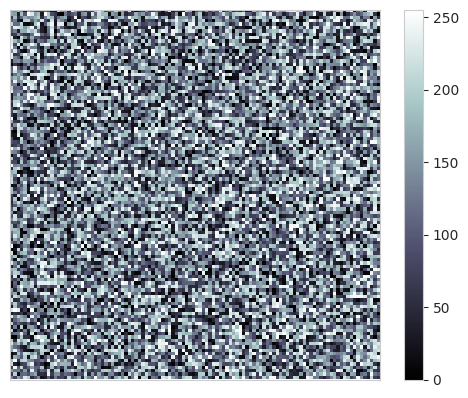

In [ ]:
# Пример: «градации серого» на основе случайного массива
# Создаем массив 110×110 со значениями от 0 до 255
ex2 = np.random.randint(0, 256, (110, 110))
print(ex2)

# Отображаем массив как изображение с палитрой 'bone'
plt.imshow(ex2, cmap='bone')

# Убираем метки делений на осях
plt.xticks([])
plt.yticks([])

# Добавляем цветовую шкалу справа
plt.colorbar()

# Показываем результат
plt.show()

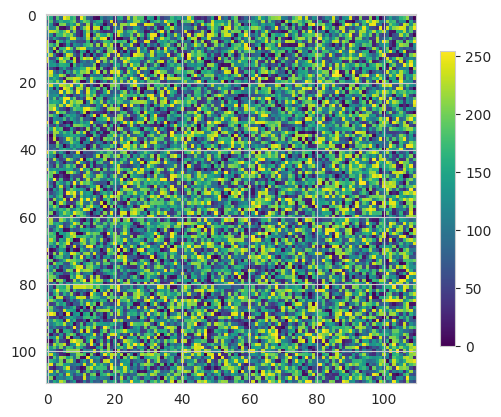

Горизонтальная шкала


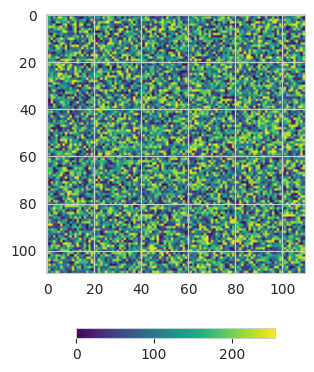

In [ ]:
# Пример: использование цветовой карты `viridis` и ориентации шкалы
# 1. Вертикальная шкала
im = plt.imshow(ex2, cmap='viridis')

# Добавляем вертикальную шкалу цветового диапазона, немного уменьшая её
plt.colorbar(im, orientation='vertical', shrink=0.8)

# Показываем график
plt.show()

# 2. Горизонтальная шкала

# Повторно отображаем изображение
im = plt.imshow(ex2, cmap='viridis')

print("Горизонтальная шкала")

# Добавляем горизонтальную шкалу более компактного размера
plt.colorbar(im, orientation='horizontal', shrink=0.4)

plt.show()

## Анализ с NumPy: от отрезка к синусу и косинусу

В этом разделе функция **`np.linspace()`** используется как инструмент для задания **равномерной числовой сетки** на отрезке \([a, b]\). Такая сетка интерпретируется как набор точек по оси \(x\), в которых далее вычисляются значения функций.

С точки зрения математического анализа, мы переходим от непрерывной функции к её **дискретному представлению**: вместо произвольного (x in [a, b]) рассматриваем конечное число узлов сетки и соответствующие значения (sin(x)) и (cos(x)). Это стандартный подход в численных методах, когда функции изучают и обрабатывают в виде массивов чисел.

Тригонометрические функции (sin(x)) и \(cos(x)) здесь выступают в роли базовых **периодических сигналов**. Они обладают хорошо известными свойствами (периодичность, ограниченность, чётность/нечётность), что делает их удобными для иллюстрации как математических идей, так и принципов работы с данными в NumPy.

Для программиста, изучающего нейронные сети, важен именно этот переход:  
функция → вычисления на сетке → **массив чисел**, который можно:
- визуализировать с помощью библиотек наподобие Matplotlib;
- использовать как простейший тестовый набор данных;
- рассматривать как прототип входных сигналов для будущих моделей.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Дискретизация отрезка: задаём сетку по x
# Создаём 200 равномерно расположенных точек на отрезке [0, 2π]
x = np.linspace(0, 2 * np.pi, 200)

# 2. Вычисляем значения функций на сетке
y_sin = np.sin(x)   # значения синуса на сетке
y_cos = np.cos(x)   # значения косинуса на сетке

In [ ]:
# Вывод первых 10 значений
print(y_sin[:10])
print(y_cos[:10])

[0.         0.03156855 0.06310563 0.09457981 0.12595971 0.15721404
 0.18831167 0.21922158 0.24991296 0.28035523]
[1.         0.99950159 0.99800685 0.99551728 0.99203536 0.98756455
 0.98210932 0.9756751  0.96826831 0.95989632]


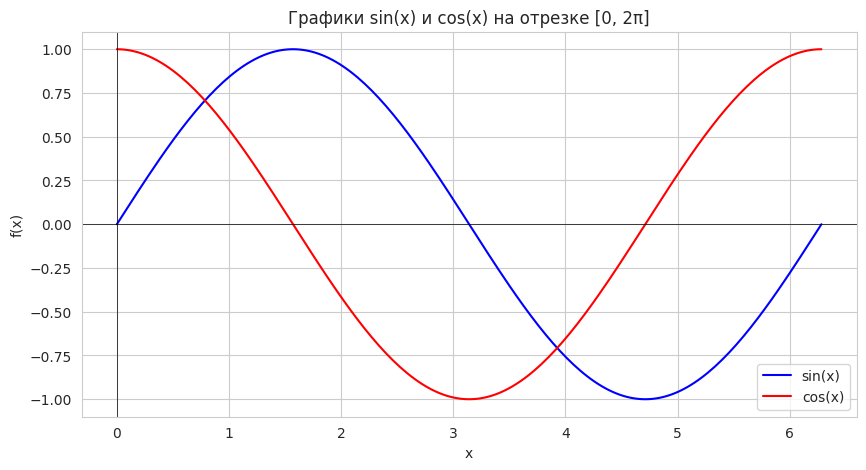

In [ ]:
# 3.1. Строим графики sin(x) и cos(x) на одном рисунке с применением plt.figure
plt.figure(figsize=(10, 5))                  # размер области для графика

plt.plot(x, y_sin, label='sin(x)', color='b')  # линия синуса (синяя)
plt.plot(x, y_cos, label='cos(x)', color='r')  # линия косинуса (красная)

plt.title('Графики sin(x) и cos(x) на отрезке [0, 2π]')  # заголовок
plt.xlabel('x')                                          # подпись оси X
plt.ylabel('f(x)')                                       # подпись оси Y

plt.axhline(0, color='black', linewidth=0.5)  # тонкая линия по оси Ox
plt.axvline(0, color='black', linewidth=0.5)  # тонкая линия по оси Oy

plt.legend()                                  # выводим легенду
plt.grid(True)                                # включаем сетку

plt.show()                                    # показываем график

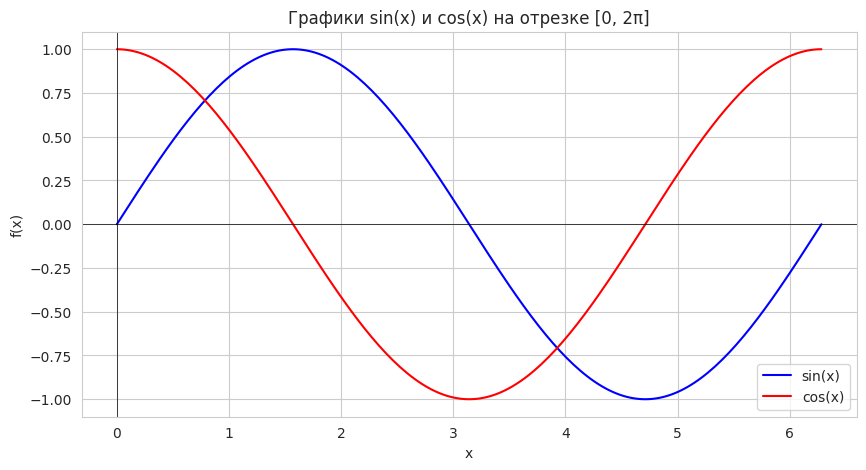

In [ ]:
# 3.2. Строим графики sin(x) и cos(x) на одном рисунке (через subplots)

fig, ax = plt.subplots(figsize=(10, 5))   # создаём фигуру и одну ось

ax.plot(x, y_sin, label='sin(x)', color='b')  # линия синуса (синяя)
ax.plot(x, y_cos, label='cos(x)', color='r')  # линия косинуса (красная)

ax.set_title('Графики sin(x) и cos(x) на отрезке [0, 2π]')  # заголовок
ax.set_xlabel('x')                                          # подпись оси X
ax.set_ylabel('f(x)')                                       # подпись оси Y

ax.axhline(0, color='black', linewidth=0.5)  # тонкая линия по оси Ox
ax.axvline(0, color='black', linewidth=0.5)  # тонкая линия по оси Oy

ax.legend()                                   # выводим легенду
ax.grid(True)                                 # включаем сетку

plt.show()                                    # показываем график


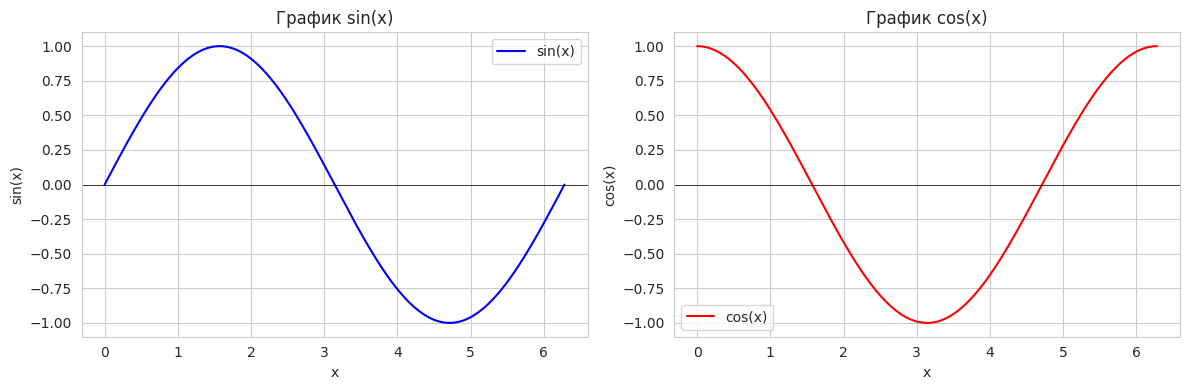

In [ ]:
# 3.3. Строим графики sin(x) и cos(x) на разных рисунках (через subplots)
# Окно 1: график sin(x)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 строка, 2 столбца

# Левый график: sin(x)
axs[0].plot(x, y_sin, label='sin(x)', color='b')
axs[0].set_title('График sin(x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('sin(x)')
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].grid(True)
axs[0].legend()

# Правый график: cos(x)
axs[1].plot(x, y_cos, label='cos(x)', color='r')
axs[1].set_title('График cos(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('cos(x)')
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


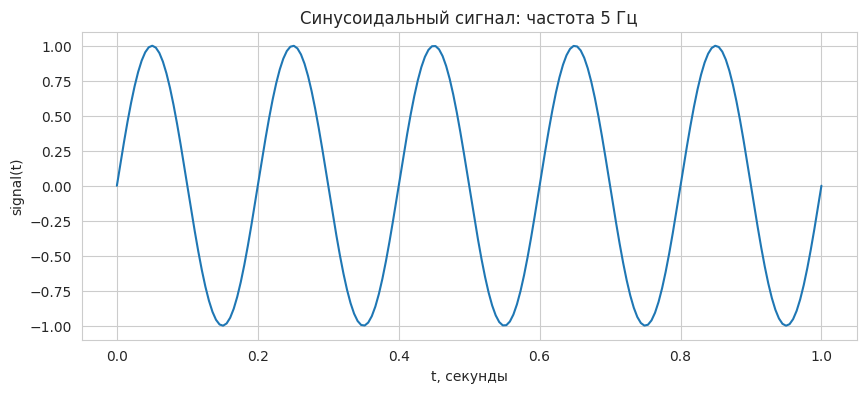

In [ ]:
# 4. Пример: интерпретация как дискретный сигнал во времени

# Пусть x — это "время" от 0 до 1 секунды
t = np.linspace(0, 1, 200)           # 200 точек времени
freq = 5                             # частота сигнала 5 Гц
signal = np.sin(2 * np.pi * freq * t)  # синусоидальный сигнал

plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Синусоидальный сигнал: частота 5 Гц')
plt.xlabel('t, секунды')
plt.ylabel('signal(t)')
plt.grid(True)
plt.show()

In [ ]:
# 5. Подготовка данных в виде "таблицы" для дальнейшей работы (например, в нейросети)

# Вектор признаков: x и sin(x)
X = x.reshape(-1, 1)       # превращаем в столбец (N, 1)
y = y_sin                  # целевая переменная — значения sin(x)

print('Форма X:', X.shape)  # (200, 1)
print('Форма y:', y.shape)  # (200,)

Форма X: (200, 1)
Форма y: (200,)


Комментарии к полученной форме:
* `X.shape = (200, 1)` — двумерный массив: 200 строк и 1 столбец (как таблица с одним столбцом).  
* `y.shape = (200,)` — одномерный массив: просто 200 чисел в ряд, без строк и столбцов.  
* Запятая в записи `(200,)` показывает, что это кортеж из одного элемента (одна размерность), а не просто число `200`.

## Параметры оформления графика


В `matplotlib` почти каждая линия на графике настраивается с помощью **именованных параметров**: можно менять цвет, толщину, вид маркера, стиль линии и многое другое.  
Такие параметры записываются прямо в скобках функции `plt.plot(...)` и позволяют сделать график более понятным и наглядным для чтения.

Ниже пример кода, в котором использовано разные настройки:


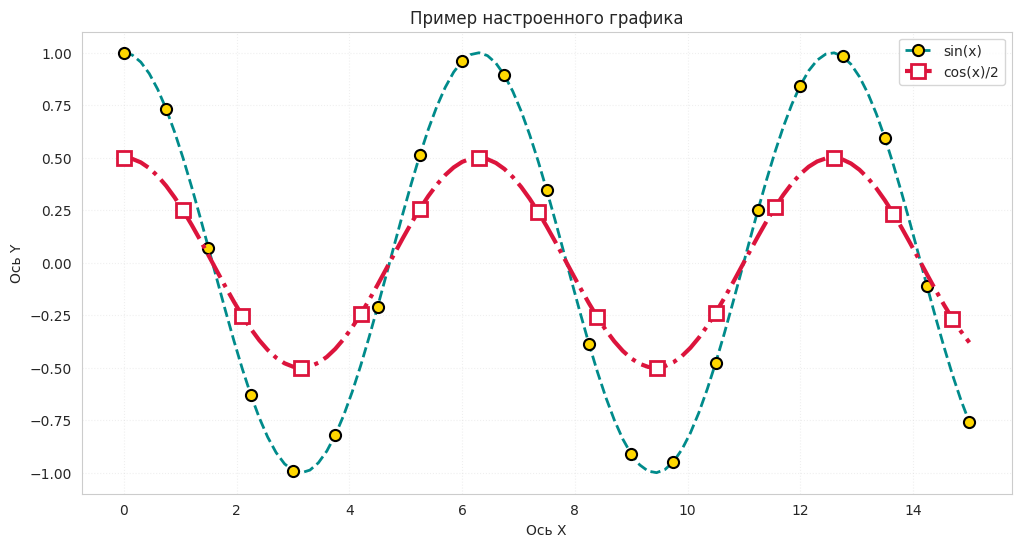

In [ ]:
plt.figure(figsize=(12, 6))              # размер окна: 12×6 дюймов

x = np.linspace(0, 15, 101)
y = np.cos(x)

plt.plot(
    x, y,
    label='sin(x)',                      # текст в легенде для этой кривой
    color='darkcyan',                    # цвет линии
    linewidth=2,                         # толщина линии
    linestyle='--',                      # тип линии: пунктир
    marker='o',                          # форма маркера: кружок
    markersize=8,                        # размер маркера
    markerfacecolor='gold',             # цвет заливки маркера
    markeredgecolor='black',            # цвет контура (границы) маркера
    markeredgewidth=1.5,                # толщина контура маркера
    markevery=5                          # ставить маркеры через каждые 5 точек
)

plt.plot(
    x, np.cos(x) / 2,
    label='cos(x)/2',                    # подпись второй кривой
    color='crimson',                     # цвет линии
    linewidth=3,                         # более толстая линия
    linestyle='-.',                      # штрих‑пунктирная линия
    marker='s',                          # маркеры‑квадраты
    markersize=10,                       # маркеры чуть больше
    markerfacecolor='white',            # белая заливка маркера
    markeredgecolor='crimson',          # граница маркера того же цвета, что и линия
    markeredgewidth=2,                  # толстый контур маркера
    markevery=7                          # маркеры через каждые 7 точек
)

plt.title('Пример настроенного графика')  # заголовок
plt.xlabel('Ось X')                       # подпись оси X
plt.ylabel('Ось Y')                       # подпись оси Y

plt.legend(loc='best')                   # легенда в «лучшем» свободном месте
plt.grid(alpha=0.3, linestyle=':')       # полупрозрачная точечная сетка

plt.show()                               # показать рисунок

Для самостоятельного изучения имеет смысл открыть документацию `matplotlib.pyplot.plot` и `matplotlib.pyplot.figure`, там есть полный перечень параметров и примеры их использования.

## Другие виды визуализаций

### Столбчатая диаграмма (bar chart)

Столбчатые диаграммы — это классический инструмент для визуализации категориальных данных. Они идеально подходят, когда нужно наглядно сравнить дискретные группы: количество продаж по месяцам, оценки студентов или популярность языков программирования.

#### Вертикальная диаграмма (`plt.bar`)

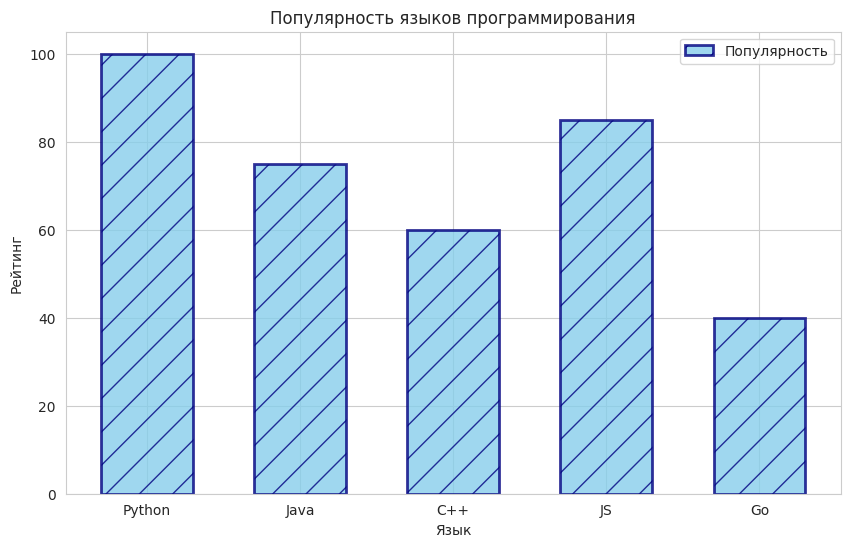

In [ ]:
langs = ['Python', 'Java', 'C++', 'JS', 'Go']
popularity = [100, 75, 60, 85, 40]

plt.figure(figsize=(10, 6))

plt.bar(
    langs, popularity,
    color='skyblue',          # основной цвет столбцов
    width=0.6,                # ширина столбцов (от 0 до 1)
    edgecolor='navy',         # цвет границы
    linewidth=2,              # толщина границы
    alpha=0.8,                # прозрачность (0 — невидимый, 1 — плотный)
    hatch='/',                # узор штриховки (например: '/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*')
    label='Популярность'      # метка для легенды
)

plt.title('Популярность языков программирования')
plt.xlabel('Язык')
plt.ylabel('Рейтинг')
plt.legend()
plt.show()

#### Горизонтальная диаграмма (`plt.barh`)
Если названия категорий слишком длинные, удобнее использовать горизонтальные столбцы. Для этого вместо `plt.bar` используется функция `plt.barh`.

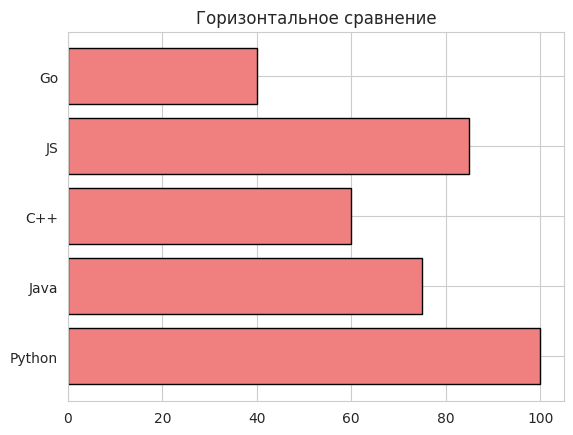

In [ ]:
plt.barh(langs, popularity, color='lightcoral', edgecolor='black')
plt.title('Горизонтальное сравнение')
plt.show()

Ключевые параметры и возможности
Помимо базовых настроек, у столбчатых диаграмм есть важные дополнительные свойства:

* `x` / `y` (или `bottom` / `left`): Координаты расположения столбцов и их базовые значения.

* `width` / `height`: Ширина (для вертикальных) или высота (для горизонтальных) столбцов. Позволяет делать столбцы тоньше или толще.

* `color`: Может принимать один цвет или список цветов для каждого столбца отдельно.

* `edgecolor` и `linewidth`: Помогают визуально отделить столбцы друг от друга, особенно при низкой прозрачности.

* `alpha`: Полезен, если на фоне есть сетка или другие графики, которые не должны полностью перекрываться.

* `hatch`: Строковой символ, определяющий текстуру заливки. Это отличный способ сделать графики различимыми даже при печати на черно-белом принтере.

* `align`: Определяет, как столбец выравнивается относительно координаты: 'center' (по центру) или 'edge' (по краю).

* `tick_label`: Позволяет задать текстовые метки для осей, если в качестве данных используются числовые индексы.

### Круговая диаграмма (pie chart)

Круговые диаграммы идеально подходят для визуализации **долей или процентов**, когда нужно показать отношение частей к целому. В Matplotlib основным инструментом для этого является функция `plt.pie()`.

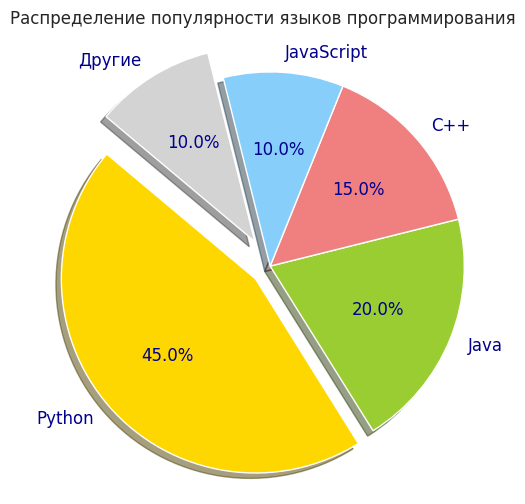

In [ ]:
# Базовый пример с расширенными настройками
import matplotlib.pyplot as plt

# Данные: категории и их значения
labels = ['Python', 'Java', 'C++', 'JavaScript', 'Другие']
sizes = [45, 20, 15, 10, 10]
# "Взрыв" (смещение) для первого и последнего секторов
explode = (0.1, 0, 0, 0, 0.15)

plt.figure(figsize=(6, 6))

plt.pie(
    sizes,
    labels=labels,            # подписи к секторам
    autopct='%1.1f%%',        # формат отображения процентов (один знак после запятой)
    startangle=140,           # начальный угол поворота (удобно для выравнивания)
    explode=explode,          # отделение секторов от центра
    shadow=True,              # добавление тени для объема
    colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgrey'], # свои цвета
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}, # настройка границ секторов
    textprops={'fontsize': 12, 'color': 'darkblue'}    # настройка шрифта текста
)

plt.title('Распределение популярности языков программирования')
plt.axis('equal')             # гарантирует, что диаграмма будет идеально круглой
plt.show()

Ключевые параметры `plt.pie`:
`labels` — список строк, которые будут отображаться рядом с каждым сектором.

`autopct — строка форматирования Python для отображения числового значения внутри сектора (например, '%d%%' для целых чисел или '%1.2f' для двух знаков после запятой).

`explode` — список или массив, где каждое число означает расстояние, на которое сектор отодвигается от центра (0 — на месте).

`colors` — список цветов для каждого сектора. Можно использовать стандартные названия или HEX-коды.

`startangle` — поворачивает всю диаграмму на заданное количество градусов против часовой стрелки (по умолчанию 0 — от оси X).

`shadow` — при значении True добавляет под диаграммой легкую тень, создавая 3D-эффект.

`wedgeprops` — словарь с настройками самих «клиньев» (секторов), например, можно задать цвет и толщину границ.

`pctdistance` — расстояние от центра, на котором будут написаны проценты (по умолчанию 0.6).

`labeldistance` — расстояние от центра для текстовых подписей (по умолчанию 1.1).

#### Кольцевая диаграмма (Donut Chart)

Круговую диаграмму легко превратить в «бублик», добавив пустой круг в центр через параметр `wedgeprops` (ширина кольца) или просто наложив белый круг поверх.

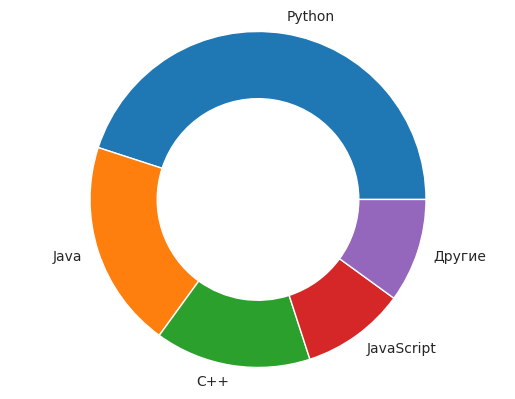

In [ ]:
# Пример "бублика" через ширину клина (width)
plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.4))
plt.axis('equal')
plt.show()

*Важно помнить: круговые диаграммы лучше не использовать, если категорий слишком много (больше 5–7), так как маленькие сектора становятся трудночитаемыми.*

## 3D‑поверхности: визуализация функции двух переменных

Теперь свяжем визуализацию с математикой. Рассмотрим функцию двух переменных $f(x,y)$, у которой есть минимум: мы можем интерпретировать её как «рельеф», где высота $z$ равна значению функции, то есть $z=f(x,y)$.  
В 3D‑графике это выглядит как поверхность с «впадинами» (минимумами) и «холмами» (большими значениями функции).

Чтобы построить такую поверхность в Matplotlib, обычно делают так:  
1) выбирают диапазоны значений $x$ и $y$;  
2) создают сетку точек на плоскости с помощью `np.meshgrid`;  
3) считают значения функции на этой сетке и получают матрицу высот $Z$;  
4) строят поверхность `ax.plot_surface(X, Y, Z)`.

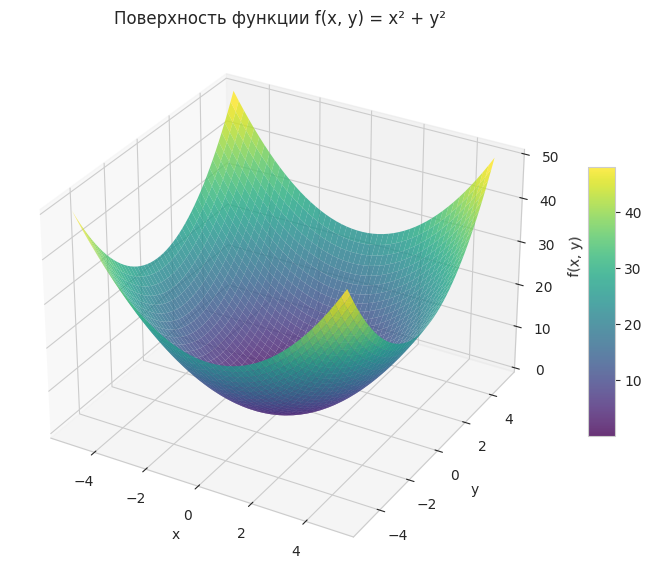

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + y**2  # простая "чаша" с минимумом в (0, 0)

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    X, Y, Z,
    cmap='viridis',
    edgecolor='none',
    alpha=0.8
)

ax.set_title('Поверхность функции f(x, y) = x² + y²')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


#### Визуализация градиентного спуска

Из матанализа вы помните: **градиент** $\nabla f(x,y)$ указывает направление *наибольшего возрастания* функции в данной точке.
Поэтому, если наша цель — найти минимум (самое маленькое значение), логично делать шаги **в противоположном направлении**, то есть вдоль $-\nabla f(x,y)$: это направление *наискорейшего убывания* (steepest descent).

Интуитивно это можно представить так: поверхность $z=f(x,y)$ — это «рельеф местности», где высота $z$ показывает значение функции.  
Одна точка на поверхности — это текущее состояние (текущее $(x, y)$), а значение $f(x,y)$ — «насколько высоко мы находимся».  
На каждом шаге алгоритм смотрит, куда «вверх» растёт функция быстрее всего (это и есть градиент), и делает небольшой шаг **вниз** в противоположную сторону.
Размер шага задаёт параметр `lr` (learning rate): слишком маленький — будем двигаться медленно, слишком большой — можем «перепрыгнуть» через дно и начать колебаться.

Ниже пример, показывающий, как точка «скатывается» по поверхности к минимуму:


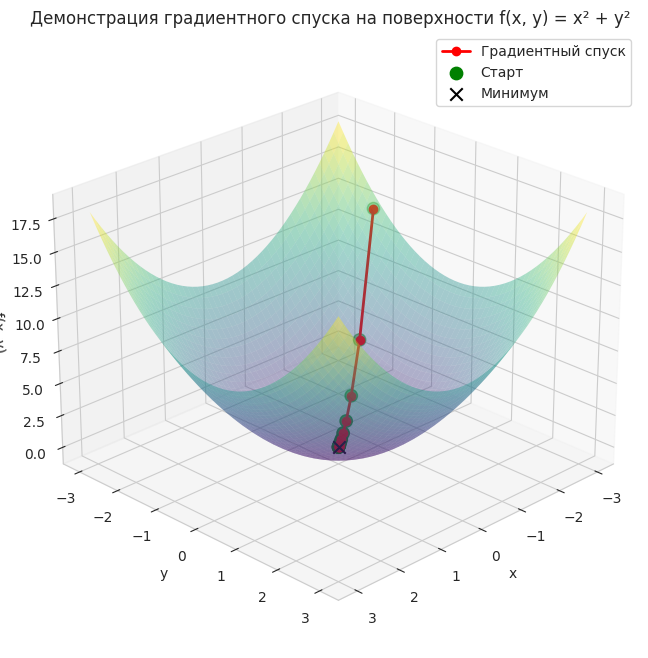

In [ ]:
def f(x, y):
    return x**2 + y**2

def grad(x, y):
    # градиент: (df/dx, df/dy) для x² + y²
    return 2*x, 2*y

# Сетка для визуализации поверхности
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Параметры градиентного спуска
start_x, start_y = -2.9, -2.0   # начальная точка
lr = 0.2                       # шаг обучения (learning rate)
steps = 12                     # число шагов

path_x, path_y, path_z = [start_x], [start_y], [f(start_x, start_y)]
cx, cy = start_x, start_y

for _ in range(steps):
    gx, gy = grad(cx, cy)      # считаем градиент
    cx -= lr * gx              # шаг против градиента по x
    cy -= lr * gy              # шаг против градиента по y
    path_x.append(cx)
    path_y.append(cy)
    path_z.append(f(cx, cy))

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

# Полупрозрачная поверхность
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4, edgecolor='none')

# Траектория спуска
ax.plot(path_x, path_y, path_z, 'r-o', linewidth=2, markersize=6,
        label='Градиентный спуск')

# Старт и финиш
ax.scatter([path_x], [path_y], [path_z], color='green', s=80, label='Старт')
ax.scatter([path_x[-1]], [path_y[-1]], [path_z[-1]], color='black', s=80, marker='x', label='Минимум')

ax.set_title('Демонстрация градиентного спуска на поверхности f(x, y) = x² + y²')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
ax.view_init(elev=25, azim=45)

plt.show()


## Задания для самостоятельного решения

**Примечание про вариант `v` и случайность (seed).**

- Во всех заданиях `v` — это ваш номер варианта (целое число). Все параметры, которые зависят от варианта (размеры массивов, диапазоны, число классов, уровень шума и т.п.), вычисляйте через `v`.
- Если в задании вы используете случайные числа, обязательно фиксируйте генератор случайных чисел через `seed`, чтобы результат был воспроизводимым при повторном запуске.
- `seed` должен зависеть от `v` (например, `seed = 100 + v`), чтобы у разных вариантов получались разные данные, но у одного и того же варианта — одинаковые.
- Если вы не используете случайные числа (например, создаёте массивы через `arange`, `linspace`), `seed` не нужен.

### Задача 1. Формы тензоров и работа с осями

Дан номер варианта `v` (целое число).

1) Создайте 1D-массив `a` из последовательных целых чисел длины `12 + v`.  
2) Преобразуйте `a` в 2D-массив `A` (матрицу) и в 3D-массив `B` (тензор). Для преобразований используйте `reshape` (данные менять нельзя).

3) Выведите для `a`, `A`, `B`:
- форму (`shape`) и число измерений (`ndim`);
- “первый элемент” в каждом представлении (покажите, что это одно и то же значение, но индексируется по‑разному).

4) Выполните и выведите результаты (значение + форму результата):
- транспонирование матрицы `A` (поменять местами строки и столбцы);
- суммирование элементов `A` по разным осям: один раз “по строкам”, один раз “по столбцам” (должны получиться результаты разной формы);
- усреднение (mean) тензора `B` по последней оси (последнее измерение должно исчезнуть).

**Требование:** используйте NumPy-операции и параметр `axis`, без циклов `for`.

In [2]:
import numpy as np
# Вариант v = 1
v = 1

# 2. Создайте 1D-массив a из последовательных целых чисел длины 12 + v.
# Длина массива = 12 + 1 = 13
array_length = 12 + v
a = np.arange(array_length)
print("1. Создан массив a (длина 13):")
print(a)
print(f"Форма a: {a.shape}, ndim = {a.ndim}\n")

# 3. Преобразуйте a в 2D-массив A (матрицу) и в 3D-массив B (тензор).
# Для преобразований используйте reshape (данные менять нельзя).

A = a.reshape(-1, 1)
B = a.reshape(1, -1, 1)

print("2. Преобразованные массивы:")
print("A (2D) как вектор-столбец (13, 1):\n", A)
print(f"Форма A: {A.shape}, ndim = {A.ndim}")
print("\nB (3D) как (1, 13, 1):\n", B)
print(f"Форма B: {B.shape}, ndim = {B.ndim}\n")

# 4. Выведите для a, A, B: форму (shape) и число измерений (ndim)
print("3. Свойства массивов (повторно):")
print(f"a: форма {a.shape}, ndim = {a.ndim}")
print(f"A: форма {A.shape}, ndim = {A.ndim}")
print(f"B: форма {B.shape}, ndim = {B.ndim}\n")

# 5. “первый элемент” в каждом представлении.
print("4. Первый элемент:")
print(f"a[0] = {a[0]}")
print(f"A[0, 0] = {A[0, 0]}")
print(f"B[0, 0, 0] = {B[0, 0, 0]}")
print(f"Все они равны? {a[0] == A[0,0] == B[0,0,0]}\n")

# 6. Выполните и выведите результаты (значение + форму результата):
print("5. Операции с массивами:")

# - транспонирование матрицы A (поменять местами строки и столбцы)
A_T = A.T
print("Транспонирование A (получаем вектор-строку (1, 13)):")
print(A_T)
print(f"Форма A_T: {A_T.shape}")

# - суммирование элементов A по разным осям
sum_axis0 = A.sum(axis=0)  # сумма по строкам (схлопываем строки, остается один столбец)
sum_axis1 = A.sum(axis=1)  # сумма по столбцам (схлопываем столбцы, остается 13 элементов)

print(f"\nСумма элементов A по оси 0 (по строкам): {sum_axis0}")
print(f"Форма: {sum_axis0.shape}")
print(f"Сумма элементов A по оси 1 (по столбцам): {sum_axis1}")
print(f"Форма: {sum_axis1.shape}")

# - усреднение (mean) тензора B по последней оси
mean_B_last = B.mean(axis=-1)
print(f"\nСреднее B по последней оси (axis=-1):")
print(mean_B_last)
print(f"Форма: {mean_B_last.shape}")


Решение для варианта v = 1
1. Создан массив a (длина 13):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Форма a: (13,), ndim = 1

2. Преобразованные массивы:
A (2D) как вектор-столбец (13, 1):
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
Форма A: (13, 1), ndim = 2

B (3D) как (1, 13, 1):
 [[[ 0]
  [ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]
  [ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]
  [11]
  [12]]]
Форма B: (1, 13, 1), ndim = 3

3. Свойства массивов (повторно):
a: форма (13,), ndim = 1
A: форма (13, 1), ndim = 2
B: форма (1, 13, 1), ndim = 3

4. Первый элемент:
a[0] = 0
A[0, 0] = 0
B[0, 0, 0] = 0
Все они равны? True

5. Операции с массивами:
Транспонирование A (получаем вектор-строку (1, 13)):
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12]]
Форма A_T: (1, 13)

Сумма элементов A по оси 0 (по строкам): [78]
Форма: (1,)
Сумма элементов A по оси 1 (по столбцам): [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Форма: (13,)

Среднее B по последней оси (axis=-1):
[[ 0.  1.  2.  3.  4.  5.  6. 

### Задача 2. Матричные операции и проверка форм

Дан номер варианта `v` (целое число).

1) Сгенерируйте матрицу `A` размера `(3 + v, 3 + v)` и вектор `b` длины `3 + v`.

2) Выведите формы `A` и `b`.

3) Посчитайте произведение матрицы на вектор (получится новый вектор). Выведите результат и его форму.

4) Посчитайте произведение транспонированной матрицы на исходную матрицу (должна получиться квадратная матрица). Выведите форму результата.

5) Найдите:
- скалярное произведение двух векторов (например, `b` и результата из пункта 3);
- сумму элементов на главной диагонали матрицы из пункта 4.

6) Выведите все полученные значения в читаемом виде.

**Требование:** использовать операции NumPy для матричных вычислений без циклов `for`.

In [15]:
import numpy as np
np.random.seed(42)

v = 1


#2
size = 3 + v

A = np.random.randint(1, 10, size = (size, size))
b = np.random.randint(1, 10, size = (size))

print("1. Сгенерированные массивы A и b: ")
print(f"Матрица А размера {size}x {size}:\n", A)
print(f"Вектор b длины {size}:\n", b)



print("\n2. форма массивов: ")
print(f"форма А: {A.shape}")
print(f"форма b: {b.shape}")

# Посчитайте произведение матрицы на вектор (получится новый вектор).
# Выведите результат и его форму.
res = np.dot(A, b)
print("\n3. Произведение матрицы на вектор: ")
print(res)
print(f"Форма результата: {res.shape}")


# Посчитайте произведение транспонированной матрицы на
# исходную матрицу (должна получиться квадратная матрица).
# Выведите форму результата.


Ats = np.dot(A.T, A)
print("\n4. Произведение матриц A.T и A")
print(Ats)
print(f"Форма A.T * A: {Ats.shape}")


#Найдите:
#скалярное произведение двух векторов (например, b и результата из пункта 3);
#сумму элементов на главной диагонали матрицы из пункта 4.
scalar = np.dot(b, res)
print("\n5 Скалярные и диагональные произведения: ")
print(f"Скалярное произведение b и (A * b): {scalar}")

onediagonal = np.trace(Ats)
print(f"Сумма элементов на главной диагонали A.T * A: {onediagonal}")







1. Сгенерированные массивы A и b: 
Матрица А размера 4x 4:
 [[7 4 8 5]
 [7 3 7 8]
 [5 4 8 8]
 [3 6 5 2]]
Вектор b длины 4:
 [8 6 2 5]

2. форма массивов: 
форма А: (4, 4)
форма b: (4,)

3. Произведение матрицы на вектор: 
[121 128 120  80]
Форма результата: (4,)

4. Произведение матриц A.T и A
[[132  87 160 137]
 [ 87  77 115  88]
 [160 115 202 170]
 [137  88 170 157]]
Форма A.T * A: (4, 4)

5 Скалярные и диагональные произведения: 
Скалярное произведение b и (A * b): 2376
Сумма элементов на главной диагонали A.T * A: 568


### Задача 3. Векторизация: значения функции на сетке

Дан номер варианта `v` (целое число).

1) Создайте 1D-массив `x` из `N = 200 + 10·v` равномерных точек на отрезке `[-10, 10]` с помощью `linspace`.

2) Вычислите 1D-массив значений функции `y = f(x)` (функцию `f` задайте по варианту, например комбинацией `x`, `x^2`, `sin(x)`, `cos(x)`).

3) Выведите:
- формы `x`, `y`;
- минимальное и максимальное значение `y`;
- среднее значение `y`.

4) С помощью булевой маски найдите и выведите количество точек, в которых выполняется условие, например:
- `y > v/10` или `|y| < 1`.

5) Найдите индекс, где `|y|` максимально, и выведите соответствующие `x` и `y`.

**Требование:** всё считать векторно (без циклов `for`).

In [27]:
import numpy as np

v = 1

N = 200 + 10 * v
x = np.linspace(-10, 10, N)

print(f"1. Создан массив х из {N} точек: ")
print(x[:5])
print(x[-5:])
print(f"форма х: {x.shape}")


# Вычислите 1D-массив значений функции y = f(x)
#(функцию f задайте по варианту, например комбинацией x, x^2, sin(x), cos(x)).
y = x**2 * np.sin(x) - np.cos(x)

print("\n2. Вычислен массив y = f(x): ")
print(f"Первые 5 элементов y: {y[:5]}")
print(f"Последние 5 элементов y: {y[-5:]}")
print(f"Форма y: {y.shape}")


# Выведите:

# формы x, y;
# минимальное и максимальное значение y;
# среднее значение y.

print("\n3. Вывод массивов: ")
print(f"Форма x: {x.shape}")
print(f"Форма y: {y.shape}")
print(f"Минимальное значение y: {np.min(y):.4f}")
print(f"Максимальное значение y: {np.max(y):.4f}")
print(f"Среднее значение y: {np.mean(y):.4f}")


#С помощью булевой маски найдите и выведите количество точек,
#в которых выполняется условие, например:
# y > v/10 или |y| < 1.
b = y > v / 10
count_b = np.sum(b)
print(f"\n4. Кол-во точек, где y > {v} / 10 = {v/10}: {count_b} ")

#Найдите индекс, где |y| максимально, и выведите соответствующие x и y.

ind_abs = np.argmax(np.abs(y))
print(f"\n5. Точка с максимальным |y|:")
print(f"Индекс: {ind_abs}")
print(f"x[{ind_abs}] = {x[ind_abs]:.4f}")
print(f"y[{ind_abs}] = {y[ind_abs]:.4f}")
print(f"|y| = {np.abs(y[ind_abs]):.4f}")


1. Создан массив х из 210 точек: 
[-10.          -9.90430622  -9.80861244  -9.71291866  -9.61722488]
[ 9.61722488  9.71291866  9.80861244  9.90430622 10.        ]
форма х: (210,)

2. Вычислен массив y = f(x): 
Первые 5 элементов y: [55.24118262 46.14451977 36.95540909 27.76760234 18.67148274]
Последние 5 элементов y: [-16.7084044  -25.85005456 -35.10093804 -44.37009444 -53.56303956]
Форма y: (210,)

3. Вывод массивов: 
Форма x: (210,)
Форма y: (210,)
Минимальное значение y: -63.4014
Максимальное значение y: 63.8616
Среднее значение y: 0.0581

4. Кол-во точек, где y > 1 / 10 = 0.1: 97 

5. Точка с максимальным |y|:
Индекс: 189
x[189] = 8.0861
y[189] = 63.8616
|y| = 63.8616


### Задача 4. Склейка массивов и формы

Дан номер варианта `v` (целое число).

1) Создайте два 2D-массива:
- `A` размера `(3, 4 + v)`
- `B` размера `(3, 4 + v)`

2) Выведите формы `A` и `B`.

3) Склейте `A` и `B`:
- “по столбцам” (в одну матрицу с тем же числом строк, но в 2 раза больше столбцов);
- “по строкам” (в одну матрицу с тем же числом столбцов, но в 2 раза больше строк).

4) Для каждого результата выведите:
- сам массив;
- его форму (`shape`).

**Требование:** использовать функции склейки NumPy (например, `hstack`/`vstack` или `concatenate` с правильной осью), без циклов `for`.

In [30]:
v = 1

rows = 3
colons = 4 + v

np.random.seed(42)
A = np.random.randint(1, 10, size = (rows, colons))
B = np.random.randint(10, 20, size = (rows, colons))

print(f"1. Созданы два массива размером {rows} * {colons} ")
print("Матрица А: ")
print(A)
print("Матрица B: ")
print(B)

#Выведите форму А и В
print("\n2 Форма массивов: ")
print(f"Форма А: {A.shape}")
print(f"Форма B: {B.shape}")



#Склейте A и B:

# “по столбцам” (в одну матрицу с тем же числом строк,
# но в 2 раза больше столбцов);
# “по строкам” (в одну матрицу с тем же числом столбцов,
# но в 2 раза больше строк).




1. Созданы два массива размером 3 * 5 
Матрица А: 
[[7 4 8 5 7]
 [3 7 8 5 4]
 [8 8 3 6 5]]
Матрица B: 
[[11 17 15 11 14]
 [10 19 15 18 10]
 [19 12 16 13 18]]

2 Форма массивов: 
Форма А: (3, 5)
Форма B: (3, 5)


### Задача 5. Столбчатая диаграмма частот классов

Дан номер варианта `v` (целое число).

1) Сгенерируйте 1D-массив меток классов `y` длины `N = 200 + 10·v`, значения — целые числа от `0` до `K-1`, где `K = 3 + (v % 4)`.

2) Посчитайте частоты классов: сколько раз встречается каждый класс `0..K-1`.

3) Постройте столбчатую диаграмму частот:
- по оси X — номера классов `0..K-1`;
- по оси Y — частота (количество).
График должен содержать заголовок и подписи осей.

4) Включите сетку по оси Y (чтобы было проще сравнивать столбцы).

5) (Опционально) Подпишите значения над столбцами.



1. Сгенерирован массив меток классов: 
Длина N = 210
Кол-во классов К = 4
Первые 15 элементов y: [2 3 0 2 2 3 0 0 2 1 2 2 2 2 3]

2. Частоты классов: 
Класс 0: 49
Класс 1: 47
Класс 2: 56
Класс 3: 58


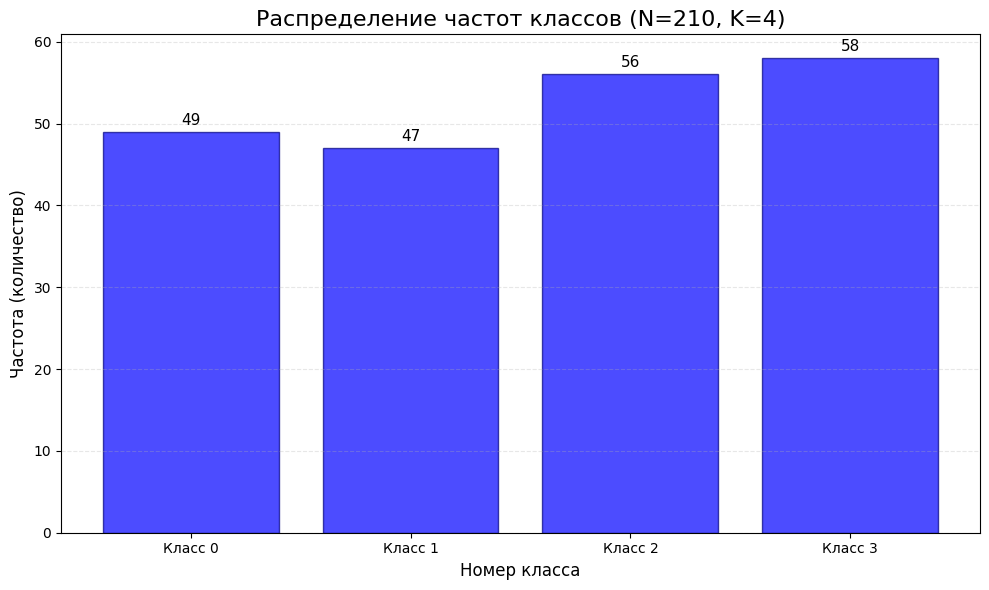


4. Статистика распределения:
Сумма частот: 210 (должно быть 210)
Минимальная частота: 47
Максимальная частота: 58
Средняя частота: 52.50


In [37]:
import matplotlib.pyplot as plt

v = 1

N = 200 + 10 * v
K = 3 + (v % 4)

np.random.seed(42)
y = np.random.randint(0, K, size = N)

print(f"1. Сгенерирован массив меток классов: ")
print(f"Длина N = {N}")
print(f"Кол-во классов К = {K}")
print(f"Первые 15 элементов y: {y[:15]}")


# Посчитайте частоты классов: сколько раз встречается каждый класс 0..K-1.

class_counts = np.bincount(y, minlength=K)

print(f"\n2. Частоты классов: ")
for i in range(K):
  print(f"Класс {i}: {class_counts[i]}")

plt.figure(figsize=(10, 6))


bars = plt.bar(range(K), class_counts, color = 'blue', edgecolor = 'navy', alpha = 0.7)



plt.title(f'Распределение частот классов (N={N}, K={K})', fontsize=16)
plt.xlabel('Номер класса', fontsize=12)
plt.ylabel('Частота (количество)', fontsize=12)


plt.grid(axis='y', alpha=0.3, linestyle='--')



plt.xticks(range(K), [f'Класс {i}' for i in range(K)])



for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()




print(f"\n4. Статистика распределения:")
print(f"Сумма частот: {np.sum(class_counts)} (должно быть {N})")
print(f"Минимальная частота: {np.min(class_counts)}")
print(f"Максимальная частота: {np.max(class_counts)}")
print(f"Средняя частота: {np.mean(class_counts):.2f}")

### Задача 6. Визуализация ошибки (loss) и оформление графиков

Дан номер варианта `v` (целое число).

1) Создайте сетку `x` из `N = 200 + 10·v` точек на отрезке `[-5, 5]` с помощью `linspace`.

2) Задайте “истинные значения”:
- `y_true = sin(x)` (или другая простая функция).

3) Сгенерируйте “предсказания модели”:
- `y_pred = y_true + noise`, где `noise` — случайный шум (параметры шума зависят от `v).

4) Посчитайте:
- ошибку `e = y_pred - y_true`;
- loss по точкам `loss_point = e^2`;
- средний loss `loss_mean` (одно число).

5) Постройте **2 графика на одном полотне**:
- слева: `y_true(x)` и `y_pred(x)` на одном графике (легенда обязательна);
- справа: `loss_point(x)` (линейный график).

6) Оформление:
- заголовки у обоих графиков;
- подписи осей;
- сетка;
- в заголовке второго графика укажите `loss_mean` (округлить до 4 знаков).
---
Пример результата: 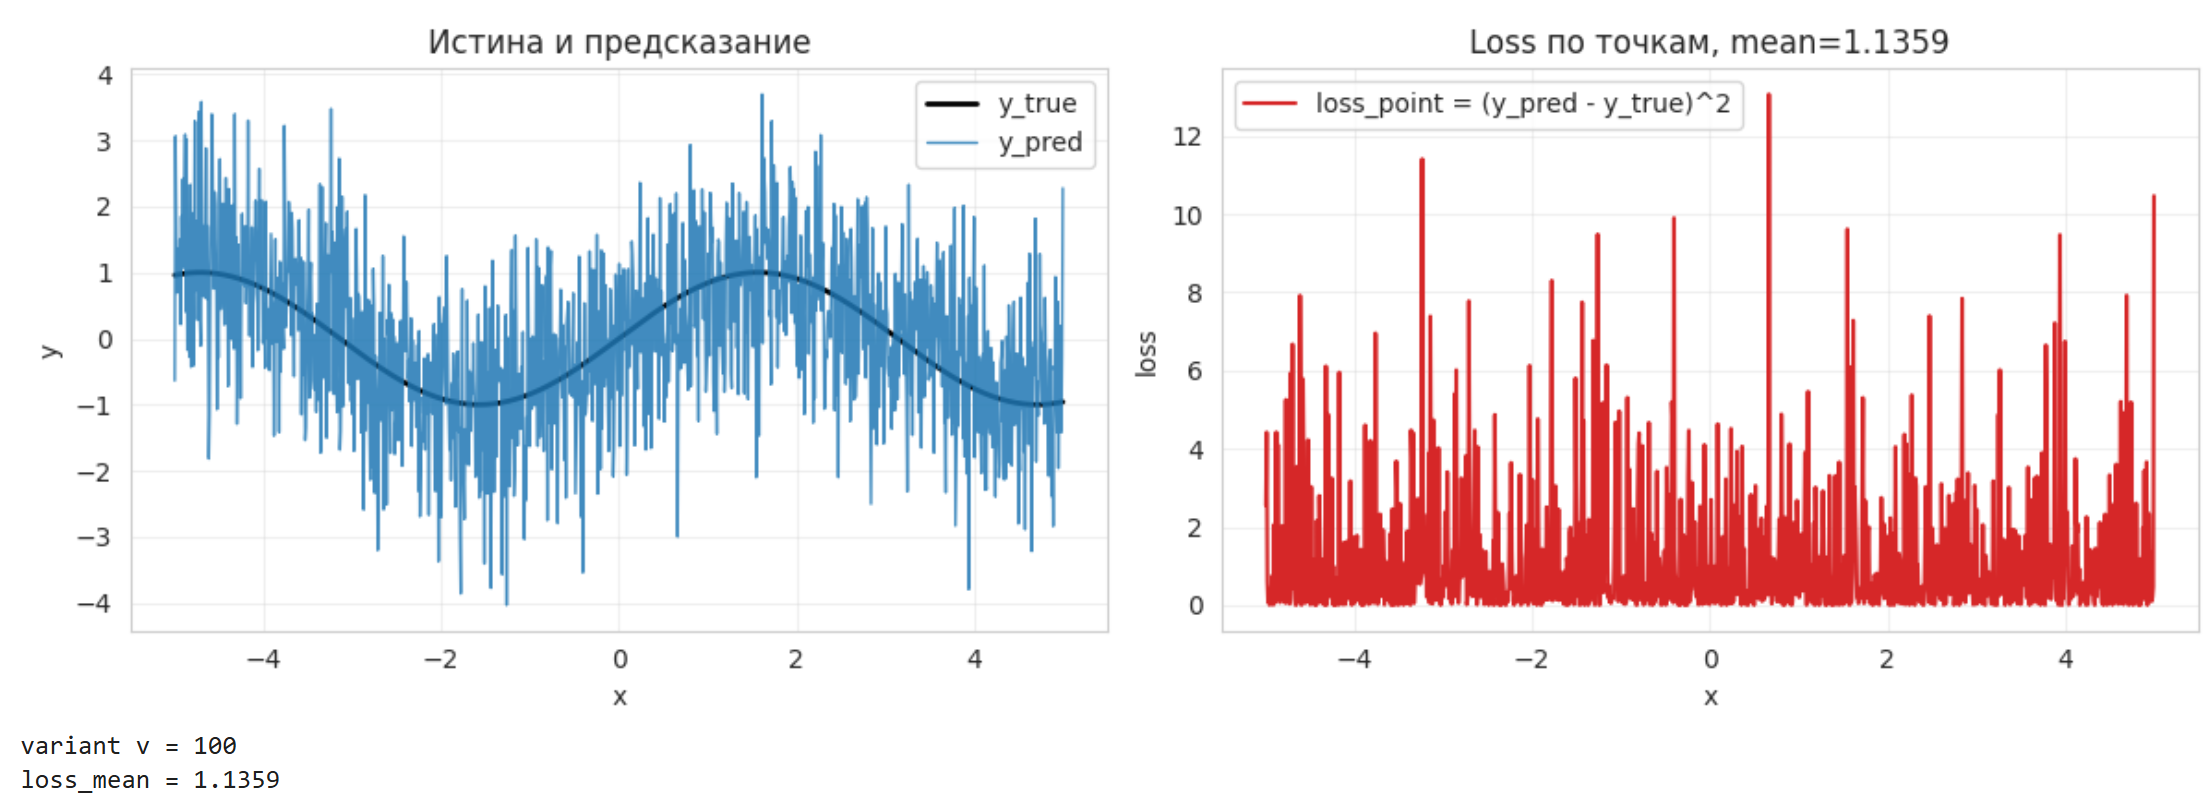

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Вариант ---
v = ... # подставьте свой номер варианта

# --- Данные ---
N = 200 + 10 * v
x = ... # сформируйте массив от -5 до 5 с числом точек N

y_true = np.sin(x)

# шум зависит от v
np.random.seed(100 + v)  # фиксируем seed, зависящий от v
sigma = 0.10 + 0.01 * v
noise = np.random.normal(loc=0.0, scale=sigma, size=N)
y_pred = y_true + noise

# --- Ошибка и loss ---
e = ... # ошибка
loss_point = ... # loss по точкам
loss_mean = ...  # средний loss

# --- Визуализация: 2 графика на одном полотне ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) # axs[0] — левый график, axs[1] — правый

# слева: y_true и y_pred
axs[0].plot(...) # график y_true
axs[0].plot(...) # график y_pred (линии графиков должны отличаться)

axs[0].set_title("Истина и предсказание")
axs[0].set_xlabel(...) # указать подпись оси
axs[0].set_ylabel(...) # указать подпись оси
axs[0].grid(alpha=0.3)
axs[0]...              # добавить легенду

# справа: loss_point
axs[1].plot(...) # график loss_point
axs[1].set_title(f"Loss по точкам, mean={...:.4f}") # вывести loss (округлить до 4 знаков)
axs[1].set_xlabel(...) # указать подпись оси
axs[1].set_ylabel(...) # указать подпись оси
axs[1].grid(alpha=0.3)
axs[1]...              # добавить легенду

plt.tight_layout()  # чтобы подписи не налезали друг на друга
plt.show()

print(f"variant v = {v}")
print(f"loss_mean = {...:.4f}") # вывести loss (округлить до 4 знаков)

Решение для варианта v = 1
Создана сетка из 210 точек на [-5, 5]
Параметр шума sigma = 0.11
Средний loss (MSE): 0.0129


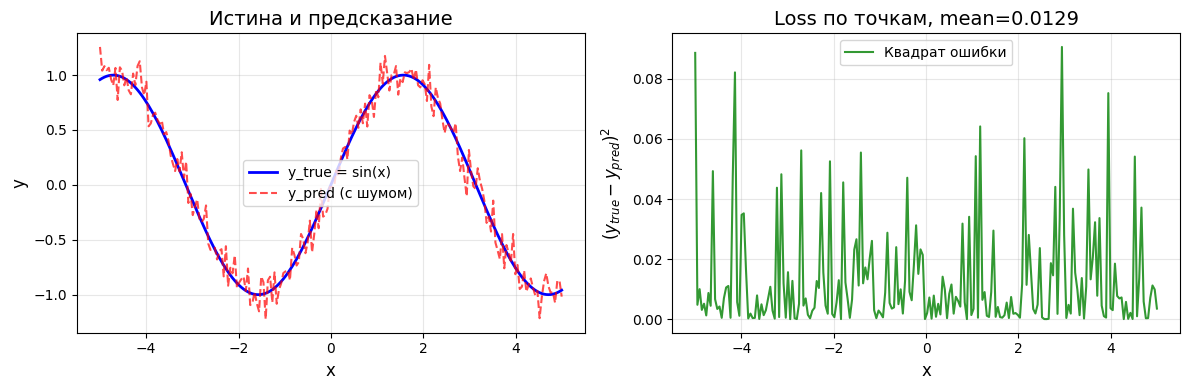


variant v = 1
loss_mean = 0.0129


In [38]:
import numpy as np
import matplotlib.pyplot as plt

v = 1

print(f"Решение для варианта v = {v}\n" + "="*50)


N = 200 + 10 * v
x = np.linspace(-5, 5, N)

y_true = np.sin(x)

# шум зависит от v
np.random.seed(100 + v)  # фиксируем seed, зависящий от v
sigma = 0.10 + 0.01 * v
noise = np.random.normal(loc=0.0, scale=sigma, size=N)
y_pred = y_true + noise

print(f"Создана сетка из {N} точек на [-5, 5]")
print(f"Параметр шума sigma = {sigma:.2f}")

#  Ошибка и loss
e = y_pred - y_true  # ошибка
loss_point = e**2    # loss по точкам (квадратичная ошибка)
loss_mean = np.mean(loss_point)  # средний loss (MSE)

print(f"Средний loss (MSE): {loss_mean:.4f}")

#2 графика на одном полотне
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# слева: y_true и y_pred
axs[0].plot(x, y_true, 'b-', linewidth=2, label='y_true = sin(x)')
axs[0].plot(x, y_pred, 'r--', linewidth=1.5, label='y_pred (с шумом)', alpha=0.7)

axs[0].set_title("Истина и предсказание", fontsize=14)
axs[0].set_xlabel("x", fontsize=12)
axs[0].set_ylabel("y", fontsize=12)
axs[0].grid(alpha=0.3)
axs[0].legend(fontsize=10)

# справа: loss_point
axs[1].plot(x, loss_point, 'g-', linewidth=1.5, label=f'Квадрат ошибки', alpha=0.8)
axs[1].set_title(f"Loss по точкам, mean={loss_mean:.4f}", fontsize=14)
axs[1].set_xlabel("x", fontsize=12)
axs[1].set_ylabel("$(y_{true} - y_{pred})^2$", fontsize=12)
axs[1].grid(alpha=0.3)
axs[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nvariant v = {v}")
print(f"loss_mean = {loss_mean:.4f}")

In [41]:
!git remote add origin https://github.com/Danial9218/Python-.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
